# Многозадачность в Python. Многопоточное программирование. 
## https://stepik.org/course/172356/syllabus

- [Многопроцессность в Python. Multiprocessing.](#group2)

# Задачи

```Python 

Есть список интернет-ресурсов. Необходимо получить заголовки всех этих страниц. Простая программа может выглядеть вот так:

import requests
from time import perf_counter


sources = ["https://ya.ru",
           "https://www.bing.com",
           "https://www.google.ru",
           "https://www.yahoo.com",
           "https://mail.ru"]

headers_stor = {}  # Храним здесь заголовки
start = perf_counter()
sum_ex_time = 0
for source in sources:
    start_tmp = perf_counter()
    headers_stor[source] = requests.get(source).headers  # получаем заголовки и формируем словарь
    delta = perf_counter() - start_tmp
    print(source, delta)
    sum_ex_time += delta
    

print(f"completed in {perf_counter()-start} seconds")  # Считаем общее время выполнения всех запросов
print(sum_ex_time)  # Показываем то, что общее время работы является простой суммой каждого запроса по отдельности
print(*headers_stor.items(), sep="\n")  # Выводим наши заголовки


Тогда на моей машине все выполнение займет чуть больше 2 секунд и это время выполнения определяется суммой каждого запроса по отдельности. Здесь мы вынуждены каждый раз ожидать ответа от ресурса в каждом запросе по очереди:



Исправим это.
Необходимо написать программу с использованием многопоточности и значительно сократить время выполнения так, чтобы общее время выполнения определялось самым длительным из запросов а не суммой всех:



 

2. Если справились на реальных запросах, переходите к тесту!

Допишите программу с учетом того, что список ссылок, хранилище заголовков и функция получения заголовков уже определена в тестирующей системе.
Вам необходимо только организовать создание и работу потоков! Тестирующая система проверяет время решения и содержимое хранилища заголовков.

Если бы в тестирующей системе были следующие простые определения: 
    

import time

headers_stor_test = {}

sources = ["https://ya.ru",
           "https://www.bing.com",
           "https://www.google.ru",
           "https://www.yahoo.com",
           "https://mail.ru"]


def get_request_header(url: str):
    time.sleep(0.8)
    headers_stor_test[url] = "OK"


start_time = time.perf_counter()  # запускаем отсчет времени проверки решения

import threading

# Ваше решение


try:
    delta_time = time.perf_counter() - start_time
    assert delta_time <= 1
except AssertionError:
    raise Exception("!!! решение не приводит к быстродействию !!!")
print(*headers_stor_test.values(), sep="")



то вследствие выполнения вашего решения:
- не должно быть ошибки быстродействия;
- на печать должно быть выведено:
OKOKOKOKOK

```

In [ ]:
import threading

import time

headers_stor = {}

sources = ["https://ya.ru",
           "https://www.bing.com",
           "https://www.google.ru",
           "https://www.yahoo.com",
           "https://mail.ru"]


def get_request_header(url: str):
    time.sleep(0.8)
    return 'OK'


def task(source):
    headers_stor[source] = get_request_header(source)

treads = []
start_tmp = perf_counter()
for source in sources:
    treads.append(threading.Thread(target=task, args=(source,)))
for t in treads:
    t.start()
for t in treads:
    t.join() 
    
headers_stor

<h1 align="center"> * * * </h1>

``` Python

При тестировании было выявлено, что решение может зависать в случае проблем с соединением и долгого ожидания ответа от ресурса. Тимлид решает, что на каждый запрос надо отводить не более 1.5 секунды. Вместо заголовков для ресурсов, ответ от которых превышает этот лимит, необходимо заполнять строковым значением "no_response". 

Перепишите Ваше предыдущее решение с учетом этого нового условия. Все определения предыдущей задачи не изменились. Тестирующая система проверяет время выполнения решения и содержание словаря headers_stor. Ваше решение может содержать не только операции с потоками но и финальную работу со словарем заголовков.

Если бы в тестирующей системе были следующие простые определения: 

from time import sleep, perf_counter

headers_stor = {}
sources = ["bing.com",
           "google.ru",
           "yahoo.com",
           "mail.ru",
           "ya.ru"]
start_time = perf_counter()  # запускаем отсчет времени проверки решения

def get_request_header(url: str):
    # моделируем различное время ответа от ресурсов
    if url == "yahoo.com":
        sleep(10)
    elif url == "mail.ru":
        sleep(1.8)
    elif url == "google.ru":
        sleep(0.2)
    else:
        sleep(1.4)
    headers_stor[url] = "ok"


import threading


# Ваше решение


assert perf_counter() - start_time <= 2  # проверка того, что решение выполняется не более 2 секунд

print(", ".join(f'{k}-{v}' for k, v in sorted(headers_stor.items())))
то вследствие выполнения вашего решения:
- не должно быть ошибки быстродействия;
- на печать должно быть выведено:
bing.com-ok, google.ru-ok, mail.ru-no_response, ya.ru-ok, yahoo.com-no_response

```

In [ ]:
import threading
from time import sleep


def get_request_header(url: str):
    # моделируем различное время ответа от ресурсов
    if url == "yahoo.com":
        sleep(10)
    elif url == "mail.ru":
        sleep(1.8)
    elif url == "google.ru":
        sleep(0.2)
    else:
        sleep(1.4)
    headers_stor[url] = "ok"
    

def task():
    treads = []
    for source in sources:
        headers_stor[source] = "no_response"
        treads.append(threading.Thread(target=get_request_header, args=(source,)))
    for t in treads:
        t.start()
    for t in treads:
        t.join()

        
headers_stor = {}
sources = ["bing.com",
           "google.ru",
           "yahoo.com",
           "mail.ru",
           "ya.ru"]        
        
        
p = threading.Thread(target=task, daemon=True)
p.start()
p.join(1.5)

headers_stor

<h1 align="center"> * * * </h1>

``` Python

Посмотрите это видео на youtube канале Engineer Man. Кто не владеет английским, не забудьте включить субтитры и автоперевод.

Кратко опишу суть: автор видео якобы выиграл бесплатную PlayStation 5, его просят лишь ввести данные своей кредитной карты и заплатить 1 дол. за доставку. Само собой сайт фейковый, который ворует данные карты владельца и, видимо, 1 дол. Если заполнить поля ввода для кредитной карты, сайт для проверки валидности карты отправляет запросы на реальный сервис проверки, который обходится мошеннику в 5 центов за запрос. А сам запрос длится ~2 секунды.

Но вот беда, мошенник поумнел и построил защиту, которая блокирует проверочные запросы для неуникальных кредитных карт, поэтому заспамить проверку только одной картой теперь уже не получится. Напишите решение с учетом этого нового условия, чтобы в течении 4 секунд мошенник потерял 3 доллара (не менее 3 долларов).

Валидные кредитные карты - это карты с номерами в диапазоне 4007000000028 - 4007000000099 включительно.

В тестирующей системе проверяется, что:
- Ваше решение за 4 секунды (или менее) приводит к уменьшению баланса мошенника на 3 доллара (или больше).
- Ваше решение "не зависает" и выполняется не более 5 секунд.

При этом в тестирующее системе уже определена функция запроса валидации карты как:

def do_request(card_number: str):
    ...
    
```

``` Python
import threading
import random 

treads = []
losses = 300 // 5 + 1 # 5 центов за запрос, всего 300 центов
random_list = random.sample(range(4007000000028, 4007000000099+1), losses)
for id_card in random_list:
    treads.append(threading.Thread(target=do_request, args=(id_card,)))
for t in treads:
    t.start()
for t in treads:
    t.join()
    
```

<h1 align="center"> * * * </h1>

```
В коде определения функции thread_log присутствуют несколько ошибок (и, возможно, не хватает нескольких инструкций). Исправьте их. Функция очень простая, она принимает два вызываемых объекта: task - целевую задачу на выполнение отдельным демоническим потоком и log_task - целевую задачу логирования, которая должна выполниться, если выполнение task не завершилось за отведенное время (и не должна, если task выполнился за отведенное время). Контрольное время - третий аргумент функции.

Тестирующая система вызовет функцию thread_log и проверит ее работу с различными аргументами.
```

```Python

import threading
from typing import Callable


def thread_log(task: Callable, log_task: Callable, t_check: int | float) -> None:
    thread = threading.Thread(target=task, daemon=True)
    timer = threading.Timer(interval=t_check, function=log_task)
    thread.start()
    timer.start()
    thread.join(t_check)
    
    timer.cancel()
    timer.join()
    
```

<h1 align="center"> * * * </h1>

Воспроизведем функционал логирования отдельным потоком - таймером по простому условию: если рабочий поток не выполнил свою целевую задачу вовремя (не выполнил за контрольное время), то выполняется вспомогательный поток с целевой задачей логирования. Если выполнил - запуск потока логирования отменяется. Решение оформить в виде функции с именем test_thread_timer(t_check), где t_check - контрольное значение времени.

В тестирующей системе определена целевая функция рабочего потока executer, функция логирования logging.

В функции test_thread_timer Вам необходимо:

Создать и запустить рабочий поток с именем (атрибут name) Thread (англ).
Поставить на запуск с ожиданием t_check вспомогательный поток логирования с именем Timer (англ.).
Ожидать завершения рабочего потока.
Если время между окончанием завершения и запуском рабочего потока не превышает контрольного значения - отменить запуск потока логирования.
В решении нужно только определить функцию. Вызывать функцию будет тестирующая система с разными значениями времени контроля.

Внимание! Не надо ожидать завершения рабочего потока дольше контрольного времени. Вспомните об аргументе метода join и специальном аргументе потока.

Внимание, подсказки!

1. Thread  и Timer  это имена потоков (атрибут name) а не имена переменных объектов потока. Переменные с заглавной буквы в python обычно означают константу.
2. Чтобы не ожидать завершения рабочего потока, не забудьте поставить атрибут демона.
3. Метод cancel не возбуждает ошибку при вызове даже для выполненного потока, перед ним не нужны никакие дополнительные условия.
4. В задаче не обязательно рассчитывать какую-то уставку времени и проверку, достаточно воспользоваться методом join для рабочего потока!

```Python

import threading
from time import perf_counter as pc

def test_thread_timer(t_check: int | float):
    p = threading.Thread(target=executer, name='T1', daemon=True)
    t = threading.Timer(t_check, function=logging)
    t.name = 'T2'
    p.start()
    t.start()
    p.join(t_check + 1)
    t.cancel()

```

<h1 align="center"> * * * </h1>

Напишите функцию callback_handler, которая запускает целевую задачу (например, выполнение запроса), а в случае получения результата за заданное время запускает дополнительную задачу (например, сохранение результата запроса).

Напишите функцию, которая выполняет целевую задачу task и задачу дополнительной обработки callback_task в отдельных потоках. При этом известно, что признаком успешного выполнения целевой задачи является переменная result, которая в случае успеха принимает значение True (False - значение по умолчанию). Переменная result доступна в глобальной области видимости.

Целевая функция task  принимает аргументы args в виде кортежа значений, поэтому при создании потока достаточно указать threading.Thread(target=task, args=args, ....). Функция callback_task  работает без аргументов и она выполняется не мгновенно, сохранение результатов занимает небольшое время!

Для ограничения ожидания успешного выполнения целевой задачи ограничьте время работы потока целевой задачи 0.3 секундой (считаем, что за 300 мс. (или раньше) запрос точно будет успешно получен, если нет - дальнейшие ожидания нужно прекратить). Если result True, потоком - таймером выполняем дополнительную задачу и дожидаемся ее завершения, если нет - не выполняем (результат не получен, нечего сохранять).

Решите задачу без расчета времени выполнения, используйте поток, поток-таймер и методы join, start, cancel. Во временных уставках допускается погрешность в 0.05 секунды

Функции task и callback_task  определены в тестирующей системе. Система проверяет общее время решения и точность решения используя несколько запусков функции callback_handler.

```Python

from threading import Timer, Thread
from typing import Callable

def callback_handler(task: Callable = None, args=(), callback_task: Callable = None) -> None:
    t1 = Thread(target=task, args=args, daemon=True)
    t2 = Timer(1 + 0.1, function=callback_task)
    t1.start()    
    t2.start()
    t1.join(1)
    if not result:
        t2.cancel()
    t2.join()

```

<h1 align="center"> * * * </h1>

```Python

Создайте специализированный поток (через переопределения класса) получения заголовков интернет ресурсов со следующими свойствами:
1. Имя класса - GetHeaders;
2. Единственный задаваемый параметр - url: string. Ссылка на ресурс.
3. Параметр с результатом - url_headers в виде словаря где единственный ключ - url ссылка на ресурс. Значение - словарь заголовков. Значение параметра по умолчанию - None.

Допишите программу с учетом того, что список ссылок и функция получения заголовков уже определена в тестирующей системе как:

import requests


sources = ["https://ya.ru",
           "https://www.bing.com",
           "https://www.google.ru",
           "https://www.yahoo.com",
           "https://mail.ru"]

def get_request_header(url: str) -> dict:
    return requests.get(url).headers

Вам необходимо только описать класс без создания экземпляров класса и их запуска.

Примечание 1. Здесь и дальше в подобных задачах инструкции запроса оформлены в виде функции только по причине некоторых ограничений реализации тестирующей системы платформы. В реальных задачах при переопределении класса целевую функцию не обязательно оформлять в виде функции. Всю целевую задачу можно определить в методе run.

```

```Python

import threading

class GetHeaders(threading.Thread):
    def __init__(self, url):
        super().__init__()
        self.url =  url
        self.url_headers = {self.url: None}
        
    def run(self): 
        self.url_headers[self.url] = get_request_header(self.url)

```

<h1 align="center"> * * * </h1>

```Python

Ваше определение класса GetHeaders прошло проверку. Теперь запустите потоки и соберите результаты в одну переменную results, которая должна быть словарем, где ключ - имя ресурса (ссылка на ресурс url), значение - заголовки ресурса.

Известно, что каждый запрос обрабатывается от 0.3 до 2 секунд включительно. Список ресурсов может включать от 5 до 15 ссылок.

В тестирующей системе определен список ресурсов sources, определен класс GetHeaders согласно предыдущему заданию. Тестирующая система проверяет время выполнения и содержимое переменной results. Общее время выполнения программы не должно превышать максимальное время запроса.




import threading

results = {}
treads = []
for url in sources:
    t = GetHeaders(url)
    t.daemon = True
    t.start()
    treads.append(t)
[t.join(2) for t in treads]
[results.update(t.url_headers) for t in treads]

```

<h1 align="center"> * * * </h1>

```Python
Напишите класс специализированного потока MyThread, который:

Имеет дополнительные атрибуты target, result. Значение обоих атрибутов по умолчанию None.
Имеет проверку указания целевой функции. В функции run() класса должна осуществляться  проверка на передачу целевой функции (назначение target). Если target не назначен (остался в значении по умолчанию) - возбуждать исключение NoTargetException, где в качестве единственного позиционного аргумента передать имя потока. Если target назначен, присвоить атрибуту result значение, возвращаемое целевой функцией указанной в target.
При выполнении целевая функция может возбуждать различные исключения, поэтому дополнительно необходимо:

Определить функцию custom_hook, которая выводит на печать строку вида:
name (id=ID) failed
где name - имя потока, ID - идентификатор потока (ident).
Например:
T3 (id=77) failed
Указать эту функцию в качестве функции перехвата исключений.
В тестирующей системе уже определен класс NoTargetException (унаследованный от Exception), который в качестве аргумента принимает название потока (тип str) и всего-лишь выводит на печать строку вида:
name has no target
где name - переданное название потока.

Также в тестирующей системе определена целевая функция. В процессе тестирования она будет завершатся успешно и возвращать результат или возбуждать исключение в результате своей работы.

Итак: пишем класс потока  MyThread -> создаем функцию custom_hook -> назначаем ее в качестве функции перехвата исключений.

Создание и запуск потоков, проверку исключений выполняет тестирующая система.

Возможно, Вам не повредит перечитать теорию о threading.excepthook



import threading

def custom_hook(arg):
    exc_type, exc_value, exc_traceback, exc_thread = arg
    print(f'{exc_thread.name} (id={exc_thread.ident}) failed')

class MyThread(threading.Thread):

    def __init__(self, target=None, result=None):
        super().__init__()
        self.target = target
        self.result = result
    
    def run(self):
        if not self.target:
            raise NoTargetException(self.name)
        try:
            self.result = self.target()
        except Exception():
            pass

threading.excepthook = custom_hook

````

<h1 align="center"> * * * </h1>

```Python

Прежде чем идти дальше закрепим понимание работы очередей на простых заданиях.

В тестирующей системе определены две очереди: first_queue и second_queue. Оба типа queue.Queue.

Переложите все элементы из первой очереди во вторую.

Тестирующая система перед Вашим решением заполнит первую очередь. После вашего кода - проверит содержимое обоих очередей.


while not first_queue.empty():
    second_queue.put(first_queue.get())
```

<h1 align="center"> * * * </h1>

```Python

В тестирующей системе определена функция - генератор get_obj(). Генератор возвращает элементы.

Ваша задача - получить все элементы генератора и разбить их на две группы согласно качественному признаку. Каждая группа представляет собой очередь. Признак определяется функцией is_prim(). Функция возвращает True или False. Если элемент True - добавляем в очередь prim_queue, если нет - в очередь sub_queue. Ни количество элементов, ни их тип Вам не известны.


Создайте две очереди типа FIFO с соответствующими именами, запустите обход генератора и по условию заполните эти очереди.

Тестирующая система проверит содержание обоих очередей. Функция is_prim() принимающая единственный аргумент - объект для проверки, реализована в тест. системе. Не переопределяйте ее, только вызывайте.




import queue

prim_queue = queue.Queue()
sub_queue = queue.Queue()
gen = get_obj()
while True:
    try:
        t = next(gen)
        if is_prim(t) == True:
            prim_queue.put(t)
        else:
            sub_queue.put(t)
    except StopIteration:
        break
        
########################        
        
from queue import Queue

prim_queue = Queue()
sub_queue = Queue()

for obj in get_obj():
    if is_prim(obj):
        prim_queue.put(obj)
    else:
        sub_queue.put(obj)
```

<h1 align="center"> * * * </h1>

```Python
Перед Вами код, написанный стажером. Позже он будет использоваться как часть общего решения над которым работает команда, но сначала его нужно исправить. Найдите все ошибки и исправьте код.

Стажер должен был реализовать простую модель: два потребителя - один производитель. Поток - производитель должен получать элемент из источника (функция - генератор get_obj()) и если элемент проходит проверку, то отправлять его на обработку. Обработка выполняется двумя демоническими потоками - потребителями. Проверка должна выполняться функцией is_valid(). Функция принимает элемент и возвращает True или False. Если элемент не проходит проверку (is_valid возвращает False), производитель добавляет элемент в очередь none_valid_queue. Два потока - потребителя должны получать элементы из очереди валидных элементов и обрабатывать их, запуская функцию обработчика handler(). Функция handler в качестве аргумента принимает один элемент. Для ограничения длительности работы двух потоков - потребителей должна быть использована переменная timeout_handler, значение которой будет позднее задано в общем решении (timeout_handler будет задано в тестирующей системе). После того, как все элементы будут переданы в валидную очередь, программа не должна выполняться дольше, чем время, указанное в переменной timeout_handler.



from queue import Queue
from threading import Thread

valid_queue = Queue()
none_valid_queue = Queue()


def task():
    while True:
        elem = valid_queue.get()
        handler(elem)

def main():
    for elem in get_obj():
        if is_valid(elem):
            valid_queue.put(elem)
        else:
            none_valid_queue.put(elem)


main_th = Thread(target=main)
main_th.start()
main_th.join()
t1 = Thread(target=task, daemon=True)
t2 = Thread(target=task, daemon=True)
t1.start()
t2.start()
t1.join(0.5)
t2.join(0.5)


###############################


from queue import Queue
from threading import Thread
import time

# Динамические очереди (размер не задан)
valid_queue = Queue()
none_valid_queue = Queue()


def task():
    while True:
        # Если производитель не успевает заполнять очередь, потребитель ожидает когда слот заполнится
        elem = valid_queue.get()
        handler(elem)


def main():
    # Нужно взывать функцию и получить объект генератора
    for elem in get_obj():
        if is_valid(elem):
            valid_queue.put(elem)
        else:
            none_valid_queue.put(elem)

# Демонические потоки автоматически будут убиты в момент завершения главного потока            
t1 = Thread(target=task, daemon=True)
t2 = Thread(target=task, daemon=True)

# После старта, ожидают добавления элементов в очередь, чтобы извлечь и обработать
t1.start()
t2.start()

# Возникла блокирующая операция, главный поток создает поток производителя
main_th = Thread(target=main)

# Начинает валидировать и добавлять элементы в очередь
main_th.start()

# Задача производителя приоритетнее задач потребителей. Надо дождаться полного ее завершения
main_th.join() # Пока ждем завершения, потребители продолжают работать

# Прежде чем убить демонические потоки, нужно подождать заданное время
time.sleep(timeout_handler)
```

<h1 align="center"> * * * </h1>

```Python
Усложним задачу из 10 шага. Теперь функция генератор get_obj() и функция is_prim() могут ненадолго "подвисать". Генератор не мгновенно возвращает очередной элемент, а функция проверки не мгновенно возвращает результат. Но гарантируется, что генератор возвращает каждый элемент с задержкой, не превышающей 100 мс., а в случае серьезных проблем генератор возвращает значение None. После этого запрашивать следующее значение у генератора не нужно, это может привести к сбоям, ошибкам или зависанию.

Ваша задача осталась прежней: создать и заполнить две очереди, только сделать это нужно двумя потоками для улучшения производительности и отзывчивости. Поэтому создайте два дочерних потока - сортировщика, каждый будет складывать в обе очереди в зависимости от результата работы функции is_prim().

Тестирующая система проверит общее время выполнения программы, содержимое обеих очередей prim_queue, sub_queue.

Подумайте как организовать передачу объектов из функции генератора в два потока - сортировщика. Как остановить работу дочерних потоков и всей программы в случае получения значения None, но в то же время все-таки дождаться выполнения функции is_prim() для предыдущего (до None) значения, полученного от генератора.



from queue import Queue
from threading import Thread


prim_queue, sub_queue, main_queue = Queue(), Queue(), Queue()


def producer():
    for el in get_obj():
        if el is None:
            break
        main_queue.put(el)

        
def consumer():
    while True:
        el = main_queue.get()
            
        if is_prim(el):
            prim_queue.put(el)
        else:
            sub_queue.put(el)
            
            
th_prod = Thread(target=producer)
th_prod.start()

th_con1 = Thread(target=consumer, daemon=True)
th_con2 = Thread(target=consumer, daemon=True)

th_con1.start()
th_con2.start()

th_prod.join()
th_con1.join(timeout=0.2)
th_con2.join(timeout=0.2)


###########################

from threading import Thread
import queue

def try_put(gen):
    global stop 
    try:
        t = next(gen)
        if t == None:
            stop = True
        else:
            if is_prim(t):
                prim_queue.put(t)
            else:
                sub_queue.put(t)
    except StopIteration:
        stop = True
    
def consumer(gen):
    while True:
        try_put(gen)
        if stop:
            return
            
stop = False          
prim_queue = queue.Queue()
sub_queue = queue.Queue()
gen = get_obj()            
thread_0 = Thread(target=consumer, args=(gen,), name="consumer_1", daemon=True)
thread_1 = Thread(target=consumer, args=(gen,), name="consumer_2", daemon=True)
thread_0.start()
thread_1.start()
thread_0.join()
thread_1.join()


```

<h1 align="center"> * * * </h1>

```Python

Вернемся к задаче со стажером.

Решение задачи включало контроль над временем ожидания в методах join() у потоков - потребителей. Что не всегда корректно, т.к. мы не всегда можем знать уставку времени.

Измените прошлое решение (верное для предыдущей задачи) с учетом того, что теперь Вы не знаете максимально допустимое время выполнения функции обработчика. Для этого специально изменили функцию - генератор get_obj(), которая теперь последним элементом выдает None. Такой элемент означает конец обработки. При получении такого элемента потоки - потребители должны закончить свою работу.

Еще раз прочитайте примечание 4 прошлого шага и, согласно новым условиям, измените решение ниже.

Общая логика решения в подобных случаях следующая: если производитель получает элемент None, то передает его в очередь для обработки потокам - потребителям. В целевой задаче потребителей, видя что элемент None, не запускаем обработку (в зависимости от реализации, это может привести к ошибке!) а просто добавляем этот None в очередь для другого потока - потребителя и завершаемся. Таким образом все потоки - потребители завершатся и в очереди останется только значение None, которое отправил туда последний из потоков - потребителей.

    
    
    
from queue import Queue
from threading import Thread


def task():
    while True:
        elem = valid_queue.get()
        if elem is None:
            valid_queue.put(None)
            return
        handler(elem)

def main():
    for elem in get_obj():
        if elem is None:
            valid_queue.put(None)
        elif is_valid(elem):
            valid_queue.put(elem)
        else:
            none_valid_queue.put(elem)

valid_queue = Queue()
none_valid_queue = Queue()

main_th = Thread(target=main)
main_th.start()
main_th.join()
t1 = Thread(target=task, daemon=True)
t2 = Thread(target=task, daemon=True)
t1.start()
t2.start()
t1.join()
t2.join()    

```

<h1 align="center"> * * * </h1>

```Python

Ваш работодатель участвует в конкурсе цифровизации работы таможенного управления. На первом этапе конкурса от каждого участника просят предоставить упрощённую модель решения взаимодействия таможенных инспекторов, проверяющих таможенные декларации.

Таможенное управление получает грузовые таможенные декларации на проверку. Каждая декларация проверяется одним из инспекторов. Декларации должны обрабатываться с учетом категории груза, т.к. груз может быть скоропортящимся, а значит его нужно проверить и выпустить как можно скорее. Но максимальным приоритетом обладают грузы из стран таможенного союза, они обрабатываются в первую очередь.

Ваша команда уже определилась, что очередность обработки будет реализована через PriorityQueue и пока она думает над деталями реализации, Вам поручают написать класс, представляющий грузовую таможенную декларацию.

Напишите класс грузовой таможенной декларации, экземпляры которого будут использоваться в качестве объктов очереди с приоритетом:

Имя класса CCD.
При инициализации экземпляра будет передаваться словарь с информацией о грузе со следующими парами ключ: <значение>:
"cat": <категория товара по коду ТН ВЭД, тип str>
"union": <признак груза таможенного союза ЕАЭС, тип bool>
"cargo": <дополнительная информация о грузе: вес, упаковка и т.п., тип dict>
"id": <идентификационный номер, уникальный код который назначается декларации, соответствует входящему номеру, тип int>
Экземпляры класса согласно п. 2 должны иметь соответствующие публичные атрибуты: cat, union, cargo, id.
Экземпляры класса должны поддерживать сравнение, а значит Вам необходимо переопределить метод сравнения "меньше" (__lt__) (переопределние метода часто называют его перезагрузкой).
Сравнение должно быть реализовано по следующему правилу: в первую очередь обрабатываются грузы таможенного союза, если таких грузов несколько то приоритет отдается грузам с категорией скоропортящихся (это грузы с категорией "0201", "0202" и т.д. до 0209"), если и таких грузов несколько - то в первую очередь обрабатываются грузы с наименьшим входящим номером.
Возможно, Вы захотите протестировать свое решение самостоятельно перед отправкой в тест. систему. Вот несколько простых экземпляров словарей с информацией о грузе для этих целей:

d1 = {"cat": "0210", "union": True, "cargo": {"stew", 2}, "id": 1}
d2 = {"cat": "0208", "union": True, "cargo": {"liver", 1.78}, "id": 2}
d3 = {"cat": "0208", "union": True, "cargo": {"liver", 56}, "id": 3}
d4 = {"cat": "0209", "union": False, "cargo": {"pork fat", 100}, "id": 4}
d5 = {"cat": "87", "union": False, "cargo": {"bombardier", 1}, "id": 5}
d6 = {"cat": "0201", "union": False, "cargo": {"veal", 120}, "id": 7}
d7 = {"cat": "0201", "union": False, "cargo": {"veal", 79}, "id": 6}
Внимание, подсказки!
Если необходимо выполнить сложное сравнение нескольких значений, проще всего это сделать сравнив кортеж из этих значений. Причем приоритет сравнения значений будет определяться очередностью значений в кортеже. Причем в кортеже можно указывать и логические типы, например, включая таким образом проверку условия вхождения категории товаров в группу скоропортящихся и булевское значение признака ЕАЭС: (union, проверка скоропортящейся категории, id).
Остается только правильно подобрать условия: not, not in, in для union и проверки категории.



class CCD:
    def __init__(self, freight_dict):
        self.cat = freight_dict['cat']
        self.union = freight_dict['union']
        self.cargo = freight_dict['cargo']
        self.id = freight_dict['id']

    def __lt__(self, other):
        if isinstance(other, CCD):
            cat = [f'020{i}' for i in range(1, 10)]
            freight1 = (not self.union, self.cat not in cat, self.id)
            freight2 = (not other.union, other.cat not in cat, other.id)
            return freight1 < freight2
        return NotImplemented

```

<h1 align="center"> * * * </h1>

```Python

import threading
from typing import Callable
from time import perf_counter
from itertools import count


class TestWorker(threading.Thread):
    def __init__(self, task: Callable, permission: Callable, condition: threading.Condition):
        super().__init__()
        self.permission = permission
        self.task = task
        self.condition = condition

    def make_work(self):  # основной метод выполняет задачу если получено условие
        with self.condition:
            start = perf_counter()
            tmp = self.condition.wait_for(predicate=self.permission, timeout=5)
            if tmp:
                self.task()  # выполняем задачу если разрешено
            else:
                # не выполняем задачу, просто логируем, что не дождались условия и выводим время
                print(f"escaping by timer with {threading.current_thread().name=}, {perf_counter() - start}")

    def run(self):
        self.make_work()


def task():
    print(f"working task with {threading.current_thread().name=}")


_count = count(1)
condition = threading.Condition()


def permission():
    n = next(_count)
    thread_name = threading.current_thread().name
    print(f"calling permission {n} with {thread_name}")
    return False


перепишите функцию permission так, чтобы целевую задачу выполнил успешно только второй по очередности поток, вызвавший проверку условия, причем только со второго раза после истечения таймера. Только допишите необходимую логику в функции и все, что она может еще использовать. Все что уже задано  - изменять нельзя. И сам класс и создание и запуск нескольких потоков - все определено в тестирующей системе.

Гарантируется, что будет создано и запущено два или более потоков в период до истечения таймаута ожидания условия.



class LocalContexts(threading.local):
    def __init__(self):
        super().__init__()
        self._contexts = []

    def append(self, item):
        self._contexts.append(item)

    def pop(self):
        return self._contexts.pop()
    
    def in_list(self, item):
        return item in self._contexts
    
    def __len__(self):
        return len(self._contexts)

def permission():
    n = next(_count)
    thread_name = threading.current_thread().name
    stor.append(n)
    print(f"calling permission {n} with {thread_name}")
    return True if len(stor) == 2 and stor.in_list(2) else False  
    
stor = LocalContexts() 

####################


storage = threading.local()

def permission():
    n = next(_count)
    thread_name = threading.current_thread().name
    print(f"calling permission {n} with {thread_name}")
    storage.is_second = getattr(storage, 'is_second', False) or (n == 2)
    return storage.is_second and (n > 2)



```

<h1 align="center"> * * * </h1>

```Python

Если вы решили предыдущую задачу с использованием глобальной области видимости или через счетчик активных потоков, попробуйте решить задачу только с использованием локального хранилища потоков.

stor_local = threading.local()
А если предыдущую задачу уже решили с использованием threading.local(), то получите +15 дополнительных баллов за сообразительность, отправив свое предыдущее решение еще раз).

Предыдущие условия немного изменились:
1. В какой-то момент времени один из потоков получает разрешение по внешнему условию (например, получает ответ от микросервиса), в этом случае в коде программы для него формируется локальный атрибут

stor_local.permission = True
Для остальных потоков такой атрибут не будет назначен. С течением времени несколько потоков могут получить положительный ответ от сервиса, а значит уже у нескольких потоков будет атрибут stor_local.permission = True.

2. Перепишите функцию permission так, чтобы целевую задачу выполнил успешно только тот поток, кто дважды ее вызвал уже имея атрибут разрешения. В функции разрешено использовать только атрибуты stor_local.

В тестирующей системе определен класс, создаются экземпляры потоков, создано локальное хранилище потоков
stor_local = threading.local(), для некоторых потоков в некоторый момент времени создается и назначается атрибут stor_local.permission = True.



def permission():
    if not hasattr(stor_local, 'calls'):
        stor_local.calls = 0
    if hasattr(stor_local, 'permission') and stor_local.permission:
        stor_local.calls += 1
    return True if stor_local.calls >= 2 else False 

```

<h1 align="center"> * * * </h1>

```Python

Напишите класс многопоточного обработчика заданий с ограничением по количеству одновременных выполнений по следующим условиям

Имя класса HubHendler.
Атрибуты создания: n: int - значение ограничения одновременных выполнений, task - целевая функция (не использует аргументов), n_threads: int - количество потоков выполнения задания.
В классе кроме инициализатора должен быть публичный метод start_hub вызываемый без аргументов. Он создает и запускает указанное количество потоков для выполнения целевой задачи с учетом ограничения по количеству одновременных выполнений. 
При необходимости дополнительно можно создавать и использовать другие методы.
Решите задачу используя семафор.
В тестирующей системе будут созданы экземпляры HubHendler с разными атрибутами для проверки необходимого поведения. Целевая функция также будет задана в тестирующей системе.

Внимание! целевая функция не принимает и не использует никаких аргументов. Подумайте, как в классе можно защитить выполнение целевой функции семафором.



import threading
from typing import Callable


class HubHendler:
    def __init__(self, n: int, task: Callable, n_threads: int):
        self.n = n
        self.task = task
        self.n_threads = n_threads

    def start_semaphore(self, semaphore):
        semaphore.acquire(blocking=True)
        self.task()
        semaphore.release()
        
        
    def start_hub(self):
        semaphore = threading.Semaphore(self.n)
        thr = []
        for i in range(self.n_threads):
            thr.append(threading.Thread(target=self.start_semaphore, args=(semaphore,)))
        for t in thr:
            t.start()
        for t in thr:
            t.join()
            
            
##################################


import threading
from typing import Callable


class HubHendler:
    def __init__(self, n: int, task: Callable, n_threads: int):
        self.n = n
        self.task = task
        self.n_threads = n_threads
        self.semaphor = threading.Semaphore(self.n)

    def start_hub(self):
        for _ in range(self.n_threads):
            threading.Thread(target=self._executer).start()

    def _executer(self):
        with self.semaphor:
            self.task()
            
            


```

<h1 align="center"> * * * </h1>

```Python

Создайте и запустите 4 потока с целевой задачей, которая выполняет (вызывает) две функции. Целевая задача должна выполнять две функции в два этапа, разделенные одним барьером. Вторая функция должна вызываться только после успешного выполнения первой функции всеми потоками - участниками.

Создайте объект барьера, создайте целевую функцию в аргументы которой передайте объект барьера и две функции: task_st_1, task_st_2. При преодолении барьера должна вызываться функция финализатора finalizer. Создайте и запустите 4 потока, выполняющую целевую функцию.

Две задачи с именами task_st_1 и task_st_2 заданы в тестирующей системе. Функция finalizer также заранее определена в тестирующей системе.

Если бы в тестирующей системе были вот такие простые определения:
 

import time
import random


def finalizer():
    print("STAGE #1 ALL DONE!")


def task_st_1():
    time.sleep(random.uniform(0, 1))
    print(f"stage #1 done by {threading.current_thread().name}")


def task_st_2():
    time.sleep(random.uniform(0, 1))
    print(f"stage #2 done by {threading.current_thread().name}")

#  Ваше решение:

import threading

# Создайте объект барьера
# Создайте целевую функцию, выполняющую задачи в два этапа
# Создайте и запустите 4 потока
то в результате решения  должен быть аналогичный вывод:

stage #1 done by Thread-4 (task)
stage #1 done by Thread-3 (task)
stage #1 done by Thread-1 (task)
stage #1 done by Thread-2 (task)
STAGE #1 ALL DONE!
stage #2 done by Thread-1 (task)
stage #2 done by Thread-2 (task)
stage #2 done by Thread-4 (task)
stage #2 done by Thread-3 (task)



import threading


def multi_task(barrier, task_st_1, task_st_2):
    task_st_1()
    barrier.wait()
    task_st_2()

barrier = threading.Barrier(4, action=finalizer)        
thr = [threading.Thread(target=multi_task, args=(barrier, task_st_1, task_st_2)) for _ in range(4)]
for t in thr:
    t.start()
for t in thr:
    t.join()    

```

<h1 align="center"> * * * </h1>

```Python

Повторяем старое задание с новыми знаниями.

Есть список интернет-ресурсов. Необходимо получить заголовки всех этих страниц и сохранить результаты в словаре headers_stor, где ключ - ссылка на ресурс, а значение - возвращаемые функцией заголовки.

Допишите программу с учетом того, что список ссылок и функция получения заголовков уже определена в тестирующей системе как:

import requests


sources = ["https://ya.ru",
           "https://www.bing.com",
           "https://www.google.ru",
           "https://www.yahoo.com",
           "https://mail.ru"]

def get_request_header(url: str):
    return requests.get(url).headers

# headers_stor = {}  # Храним здесь заголовки

Вам необходимо только организовать создание и работу пула потоков. Тестирующая система проверяет время решения и содержимое хранилища заголовков.

Напишите решение с использованием метода map().



import concurrent.futures

with concurrent.futures.ThreadPoolExecutor(max_workers=len(sources)) as executor:
    results = list(executor.map(get_request_header, sources))
headers_stor = dict(zip(sources, results))

```

<h1 align="center"> * * * </h1>

```Python

Простое задание на закрепление методов.
С помощью пула потоков создайте необходимое количество рабочих потоков, запустите задачи, после получения результатов запустите пост обработчик. Если во время выполнения задачи возникают ошибки, выведите в консоль сообщение исключения.

Напишите решение с использованием методов submit, exception, add_done_callback.

В тестирующей системе задан список ресурсов sources, длина списка 5. Определена задача - функция worker, принимающая в качестве аргумента элемент из списка ресурсов.

В качестве задачи пост обработки напишите функцию post_worker. Все что она делает - печатает в консоль строку:
<result> saved, если при получении результата не было ошибки.
где <result> - результат, возвращаемый целевой функцией worker.


import concurrent.futures

def post_worker(future):
    try:
        result = future.result()
        print(f'{result} saved')
    except Exception as error:
        print(error)

with concurrent.futures.ThreadPoolExecutor() as executor:
    for url in sources:
        future = executor.submit(worker, url)
        future.add_done_callback(post_worker)

```

<h1 align="center"> * * * </h1>

```Python

Перепишите предыдущее решение с использованием метода submit() и одного из методов прошлого шага. Также реализуйте условие: если ответ от ресурса превышает 1,5 секунды, не дожидаться ответа от ресурса. Вместо заголовков для ресурсов, ответ от которых превышает этот лимит, следует заполнять строковым значением "no_response".

Все определения предыдущей задачи не изменились:

import requests


sources = ["https://ya.ru",
           "https://www.bing.com",
           "https://www.google.ru",
           "https://www.yahoo.com",
           "https://mail.ru"]

def get_request_header(url: str):
    return requests.get(url).headers

# headers_stor = {}  # Храним здесь заголовки

Вам необходимо только организовать создание и работу пула потоков. Тестирующая система проверяет время решения и содержимое хранилища заголовков.

Если бы в тестирующей системе были следующие простые определения:

from time import sleep

sources = ["url_1",
           "url_2",
           "url_3",
           "url_4",
           "url_5"]


def get_request_header(url: str) -> str:
    if url == "url_1":
        sleep(0.8)
    if url == "url_2":
        sleep(0.9)
    if url == "url_3":
        sleep(1.4)
    if url == "url_4":
        sleep(1.8)
    if url == "url_5":
        sleep(1.6)
    return f"{url}-headers"

# Ваше решение
import concurrent.futures

# Допишите код здесь
# не забудьте заполнить headers_stor

то Ваше решение:
1. Должно выполняться не более 2 секунд.
2. В хранилище заголовков headers_stor для всех url должны быть получены заголовки, кроме url_4 и url_5. По ним ожидание ответа больше чем 1.5 секунды.



import concurrent.futures

headers_stor = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = dict((executor.submit(get_request_header, url), url) for url in sources)
    done, not_done = concurrent.futures.wait(futures, timeout=1.5)
    for future in done:
        headers_stor[futures[future]] = future.result()
    for future in not_done:
        headers_stor[futures[future]] = 'no_response'



```

<h1 align="center"> * * * </h1>

```Python

Вспоминаем задачу с мошенником.

Теперь реализуем ее через пул потоков.  Для удобства определена функция - генератор get_card_number для номеров карт. Будем считать карты валидными, если ее номера находятся в диапазоне [4007000000100, 4007000000900]. Она определена в тестирующй системе как:

def get_card_number():
    for i in range(801):
        yield str(4007000000100 + i)

Ваша задача - с помощью пула потоков создать спам - запросы c количеством потоков - участников 15.

При этом в тестирующей системе уже определена функция создания запроса к сервису проверки карт как:

def do_request(card_number: str):
    ...

Не переопределяйте ее, а только вызывайте.

Для подобных задач, когда нас не интересует результат, лучше использовать метод submit(). Заметьте, в решении мы можем обойтись без сохранения объектов Future.




import concurrent.futures

with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executer: 
    [executer.submit(do_request, card_id) for card_id in get_card_number()]
```

<h1 align="center"> * * * </h1>

```Python

Кажется у нас проблемы! Некоторые запросы могут выполняться очень долго! Перепишите предыдущее решение с новым условием: хранилище заголовков headers_stor должен быть сформирован за время не превышающее ~1.5 секунды. 

Все остальные определения и условия программы не изменились

Если бы в тестирующей системе были следующие простые определения:

from time import sleep

sources = ["url_1",
           "url_2",
           "url_3",
           "url_4",
           "url_5"]


def get_request_header(url: str) -> str:
    if url == "url_1":
        sleep(0.8)
    if url == "url_2":
        sleep(0.9)
    if url == "url_3":
        sleep(1.4)
    if url == "url_4":
        sleep(3)
    if url == "url_5":
        sleep(1.6)
    return f"{url}-headers"

# Ваше решение
import concurrent.futures

# Допишите код здесь
# не забудьте заполнить headers_stor

# Здесь выполняется проверка содержания словаря заголовков!

то Ваше решение:
1. До инструкций проверки содержания словаря заголовков должно выполняться не более 1.5 секунды.
2. В хранилище заголовков headers_stor для всех url должны быть получены заголовки, кроме url_4 и url_5. Ведь по ним ожидание ответа больше чем 1.5 секунды, для них значение - "no_response".
3. Общее время выполнения программы не должно быть более ~ 3 секунд.

Решите задачу с использованием метода shutdown.





```

<h1 align="center"> * * * </h1>

# Первая часть нашего финального задания.

С использованием пула потоков запросите у сервиса данные по ценам.

Тикеры в файле - источнике укажите на свой вкус, например: AAPL, MSFT, AMZN, NVDA, TSLA, GOOGL, META, BRK-B, UNH, JPM.
(используйте свои тикеры интересующих Вас компаний)

В качестве параметров запроса укажите недельный таймфрейм, интервал времени запроса - с начала 2020 года по настоящий день.

Структура решения должна быть следующей:
- пул потоков выполняет целевую задачу: функцию получения данных по запросу.
- по мере получения ответа, данные попадают в потокобезопасную очередь данных.
- отдельным потоком из очереди выполняется сохранение данных в .csv файл.
- главный поток является управляющим, он только запускает потоки.

Вы можете использовать функции из предыдущего шага, скорректировав их по необходимости.

Тестирующей системы здесь нет, принимается любой ответ. Ваша задача - написать решение и опубликовать его для возможности оценки и рецензии. Не стесняйтесь показать свое решение и рецензировать чужие решения. Код-ревью - важная составляющая обучения.

Как и что именно хранить в csv файле, как его называть, как выполнять преобразование данных из ответа сервиса в данные для заполнения csv файла, обоработка ошибок - все это остается на ваше усмотрение. Не забывайте только, что данные csv файла нам нужны для будущего постороения графиков скорректированных цен.

### Добавить ошибку на тикере 'NVDA'. Работа должна продолжится для других тикеров

## Используем concurrent.futures.wait сохраняем после готовности всех тикеров

In [ ]:
import os
import requests
import pandas as pd
import json
from datetime import datetime, timezone
from typing import List, Generator
import time
import random

import threading
import concurrent.futures
import queue



def make_tickers_file(tickers: List, file: str = 'tickers.txt') -> None:
    """Создаем файл с тикерами"""
    
    with open(file, 'w') as f:
        f.writelines(ticker + '\n' for ticker in tickers)
        

def get_ticker(file: str = 'tickers.txt') -> Generator[str, None, None]:
    """Генератор тикеров"""
    
    with open(file) as file:
        for line in file:
            ticker = line.strip()
            yield ticker
        

def get_history_data(ticker: str, start_date: str, end_date: str, interval: str = "1wk") -> pd.DataFrame:
    """
    Получает исторические данные для указанного тикера актива.

    :param ticker: str, тикер актива.
    :param start_date: str, дата начала периода в формате 'дд.мм.гг'.
    :param end_date: str, дата окончания периода в формате 'дд.мм.гг'.
    :param interval: str, интервал времени (неделя, день и т.д.) (необязательный, по умолчанию '1wk' - одна неделя).
    :return: DataFrame с историческими данными.
     'high', 'open', 'close', 'volume', 'low', 'adjclose'
    """
    
    per2 = int(datetime.strptime(end_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
    per1 = int(datetime.strptime(start_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
    params = {"period1": str(per1), "period2": str(per2),
              "interval": interval, "includeAdjustedClose": "true"}
    url = f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}"
    user_agent_key = "User-Agent"
    user_agent_value = "Mozilla/5.0"
    headers = {user_agent_key: user_agent_value}
    
    history_data = requests.get(url, headers=headers, params=params).json()
    
    data = history_data['chart']['result'][0]['indicators']['quote'][0]
    data['adjclose'] = history_data['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']
    data = pd.DataFrame(data, 
                 index=history_data['chart']['result'][0]['timestamp'])
    time.sleep(random.randint(0, 2))
    print(f'get_history_data for {ticker}')
    if ticker == 'NVDA':
        raise Exception(f'Download Error {ticker}')
    return data


def file_writer(end_data: str, dir_file: str = 'tickers') -> None:
    """Функция-поток для записи файлов из очереди на диск."""
    
    while True:
        data, ticker = file_queue.get()
        end_data = end_data.replace('.', '-')
        filename = f'{ticker.lower()}_{end_data}.csv'
        os.makedirs(dir_file, exist_ok=True)
        data['date'] = data.index
        data.to_csv(os.path.join(dir_file, filename), index=False)
        time.sleep(random.randint(0, 2))
        print(f'{filename} was saved successfully')
        file_queue.task_done()
        
        
def put_task_to_queue_to_save(future, ticker: str) -> None:
    """Добавляем задачу в очередь на запись"""
    data = future.result()
    file_queue.put((data, ticker))


# Указываем временной промежуток    
start_data = '01.01.20'
end_data = '12.12.23'   

# Создаем файл с тикерами
make_tickers_file(['IBM', 'MCD', 'AAPL', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'GOOGL', 'META', 'BRK-B', 'UNH', 'JPM'])

# Создаем очередь для сохранения данных для записи
file_queue = queue.Queue()

# Создаем поток для записи файлов на диск
saver = threading.Thread(target=file_writer, args=(end_data,))
saver.daemon = True
saver.start()

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = dict((executor.submit(get_history_data, ticker, start_data, end_data, '1wk'), ticker) 
                      for ticker in get_ticker())
    done, not_done = concurrent.futures.wait(futures, return_when=concurrent.futures.ALL_COMPLETED)
    
    for future in done:
        exception = future.exception()
        if exception is not None:
            print(f'An error occurred during downloading: {exception}')
            print()
        else:
            put_task_to_queue_to_save(future, ticker=futures[future])
    for future in not_done:
        print(f'not_done {futures[future]}')
        exception = future.exception()
        if exception is not None:
            print(f'An error occurred during downloading: {exception}')
            print()
    
    # Ожидаем завершения всех задач в очереди перед выходом из программы
    file_queue.join()

In [ ]:
pd.read_csv('./tickers/tsla_12-12-23.csv')

## Используем concurrent.futures.as_completed сохраняем в порядке готовности

In [ ]:
import os
import requests
import pandas as pd
import json
from datetime import datetime, timezone
from typing import List, Generator
import time
import random

import threading
import concurrent.futures
import queue



def make_tickers_file(tickers: List, file: str = 'tickers.txt') -> None:
    """Создаем файл с тикерами"""
    
    with open(file, 'w') as f:
        f.writelines(ticker + '\n' for ticker in tickers)
        

def get_ticker(file: str = 'tickers.txt') -> Generator[str, None, None]:
    """Генератор тикеров"""
    
    with open(file) as file:
        for line in file:
            ticker = line.strip()
            yield ticker
        

def get_history_data(ticker: str, start_date: str, end_date: str, interval: str = "1wk") -> pd.DataFrame:
    """
    Получает исторические данные для указанного тикера актива.

    :param ticker: str, тикер актива.
    :param start_date: str, дата начала периода в формате 'дд.мм.гг'.
    :param end_date: str, дата окончания периода в формате 'дд.мм.гг'.
    :param interval: str, интервал времени (неделя, день и т.д.) (необязательный, по умолчанию '1wk' - одна неделя).
    :return: DataFrame с историческими данными.
     'high', 'open', 'close', 'volume', 'low', 'adjclose'
    """
    
    per2 = int(datetime.strptime(end_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
    per1 = int(datetime.strptime(start_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
    params = {"period1": str(per1), "period2": str(per2),
              "interval": interval, "includeAdjustedClose": "true"}
    url = f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}"
    user_agent_key = "User-Agent"
    user_agent_value = "Mozilla/5.0"
    headers = {user_agent_key: user_agent_value}
    
    history_data = requests.get(url, headers=headers, params=params).json()
    
    data = history_data['chart']['result'][0]['indicators']['quote'][0]
    data['adjclose'] = history_data['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']
    data = pd.DataFrame(data, 
                 index=history_data['chart']['result'][0]['timestamp'])
    time.sleep(random.randint(0, 2))
    print(f'get_history_data for {ticker}')
    if ticker == 'NVDA':
        raise Exception(f'Download Error {ticker}')
    return data


def file_writer(end_data: str, dir_file: str = 'tickers') -> None:
    """Функция-поток для записи файлов из очереди на диск."""
    
    while True:
        data, ticker = file_queue.get()
        end_data = end_data.replace('.', '-')
        filename = f'{ticker.lower()}_{end_data}.csv'
        os.makedirs(dir_file, exist_ok=True)
        data['date'] = data.index
        data.to_csv(os.path.join(dir_file, filename), index=False)
        time.sleep(random.randint(0, 2))
        print(f'{filename} was saved successfully')
        file_queue.task_done()
        
        
def put_task_to_queue_to_save(future, ticker: str) -> None:
    """Добавляем задачу в очередь на запись"""
    data = future.result()
    file_queue.put((data, ticker))


# Указываем временной промежуток    
start_data = '01.01.20'
end_data = '12.12.23'   

# Создаем файл с тикерами
make_tickers_file(['IBM', 'MCD', 'AAPL', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'GOOGL', 'META', 'BRK-B', 'UNH', 'JPM'])

# Создаем очередь для сохранения данных для записи
file_queue = queue.Queue()

# Создаем поток для записи файлов на диск
saver = threading.Thread(target=file_writer, args=(end_data,))
saver.daemon = True
saver.start()

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = dict((executor.submit(get_history_data, ticker, start_data, end_data, '1wk'), ticker) 
                      for ticker in get_ticker())

    for future in concurrent.futures.as_completed(futures):
        exception = future.exception()
        if exception is not None:
            print(f'An error occurred during downloading: {exception}')
            print()
        else:
            put_task_to_queue_to_save(future, ticker=futures[future])
        
    
    # Ожидаем завершения всех задач в очереди перед выходом из программы
    file_queue.join()

## Используем future.add_done_callback сохраняем в порядке готовности

In [ ]:
import concurrent.futures
from typing import Generator, Dict, Any
import queue
from datetime import datetime, timezone
import requests
import os
import csv
import threading
from time import perf_counter


start = perf_counter()
file_queue = queue.Queue()
user_agent_key = "User-Agent"
user_agent_value = "Mozilla/5.0"
headers = {user_agent_key: user_agent_value}


def get_ticker(file: str = "tickers.txt") -> Generator[str, None, None]:
    """
    Генератор, возвращающий тикеры активов из файла.
    :param file: str, путь к файлу с тикерами (необязательный, по умолчанию "data/tickers.txt").
    :yield: str, тикер актива.
    """
    with open(file) as file:
        for line in file:
            yield line.strip()


def get_history_data(ticker: str, start_date: str, end_date: str, interval: str = "1wk") -> Dict[str, Any]:
    """
    Получает исторические данные для указанного тикера актива.
    :param ticker: str, тикер актива.
    :param start_date: str, дата начала периода в формате 'дд.мм.гг'.
    :param end_date: str, дата окончания периода в формате 'дд.мм.гг'.
    :param interval: str, интервал времени (неделя, день и т.д.) (необязательный, по умолчанию '1wk' - одна неделя).
    :return: str, JSON-строка с историческими данными.
    """
    try:
        per2 = int(datetime.strptime(end_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
        per1 = int(datetime.strptime(start_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
        params = {"period1": str(per1), "period2": str(per2),
                "interval": interval, "includeAdjustedClose": "true"}
        url = f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}"
        response = requests.get(url, headers=headers, params=params, timeout=1)
    except requests.exceptions.ReadTimeout:
        raise ValueError(f'Ошибка по тайм-ауту запроса {ticker}')
    except Exception as err:
        raise ValueError(f'Неизвестная ошибка при запросе {ticker}, {err}')
    else:
        if response.status_code == 200:
            time.sleep(random.randint(0,2))
            print(f'get_history_data for {ticker}')
            if ticker == 'NVDA':
                raise Exception(f'Download Error {ticker}')
            
            return response.json()
        else:
            raise ValueError(f'Ошибка запроса, {response.status_code=}')
            
    


def handle_task_done(future: concurrent.futures.Future) -> None:
    """
    Обрабатывает завершенную задачу.
    :param future: concurrent.futures.Future, объект Future.
    """
    exception = future.exception()
    if exception is not None:
        print(f'Ошибка запроса получения исторических данных: {exception}')
        return
    try:
        result = future.result()
        result_data = {"meta": result["chart"]["result"][0]["meta"],
                       "timestamp": result["chart"]["result"][0]["timestamp"],
                       "prices": result["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"]}
        ticker = result_data["meta"]["symbol"]
        data_dates = result_data["timestamp"]
        data_prices = result_data["prices"]
        file_queue.put((ticker, data_dates, data_prices))
    except Exception as err:
        print(f"Неизвестная ошибка при обработке данных, {err}")


def file_writer() -> None:
    """Функция-поток для записи файлов из очереди на диск."""
    os.makedirs('csv_data', exist_ok=True)
    while True:
        ticker, data_dates,  data_prices = file_queue.get()
        with open(os.path.join('csv_data', ticker), "w", newline="") as file:
            writer = csv.writer(file)
            writer.writerow([ticker, "prices"])
            for data, price in zip(data_dates, data_prices):
                writer.writerow((datetime.fromtimestamp(data).strftime("%d.%m.%y"), price))
        file_queue.task_done()
        time.sleep(random.randint(0,2))
        print(f'{ticker} сохранен в файл успешно')


writer_thread = threading.Thread(target=file_writer, daemon=True)
writer_thread.start()

with concurrent.futures.ThreadPoolExecutor() as executor:
    for ticker in get_ticker():
        future = executor.submit(get_history_data, ticker=ticker, start_date="01.01.20", end_date="25.07.23")
        future.add_done_callback(handle_task_done)

# Ожидаем завершения всех задач в очереди перед выходом из программы
file_queue.join()
print(f"\nОбщее время выполнения: {perf_counter()-start}")

<h1 align="center"> * * * </h1>

# Вторая часть нашего задания.

Вторая часть нашего задания.

Необходимо нормализовать значения цен в ранее полученных файлах csv и создать общую наглядную картинку поведения ценных бумаг.

Так как мы будем выполнять CPU-bound операции (мат. расчеты), использование многопоточности не даст нам выйгрыша в быстродействии. Увеличением быстродействия вычислительных операций мы займемся в следующей части, изучая multiprocessing. Однако, в учебных целях, сделайте это задание с использованием нескольких потоков, придерживаясь следующего плана:
- каждый поток считывает файл из каталога и преобразует его, добавляя третий столбец - нормализованная цена. Нормализованная цена - это значение в условных ед. с базой в 100 ед.
Например, для AAPL в файле csv первые две цены имеют значения 72.8692, 76.359. Тогда нормализованная цена будет: 100.0, 104.789. Таким образом мы приведем различные цены к общему масштабу (базовой единице) для обеспечения сопоставимости и удобства анализа.
- количество рабочих потоков необходимо ограничить. Предусмотрите возможность ограничения одновременно выполнящихся рабочих потоков используя примитивы синхронизации.
- вспомните как работать с отдельными потоками, а не с пулом потоков. Оформите свое решение без применения пула потоков. Можете переопределить поток. Использование классов приветствуется, но не обязательно.
- и, наконец, в главном потоке создайте общий график всех котировок с оформлением на свое усмотрение. Формат, оформление, цвета, легенда, использование библиотеки - на ваш вкус.

Например, такой интерактивный график, построенный с помощью библиотеки plotly:

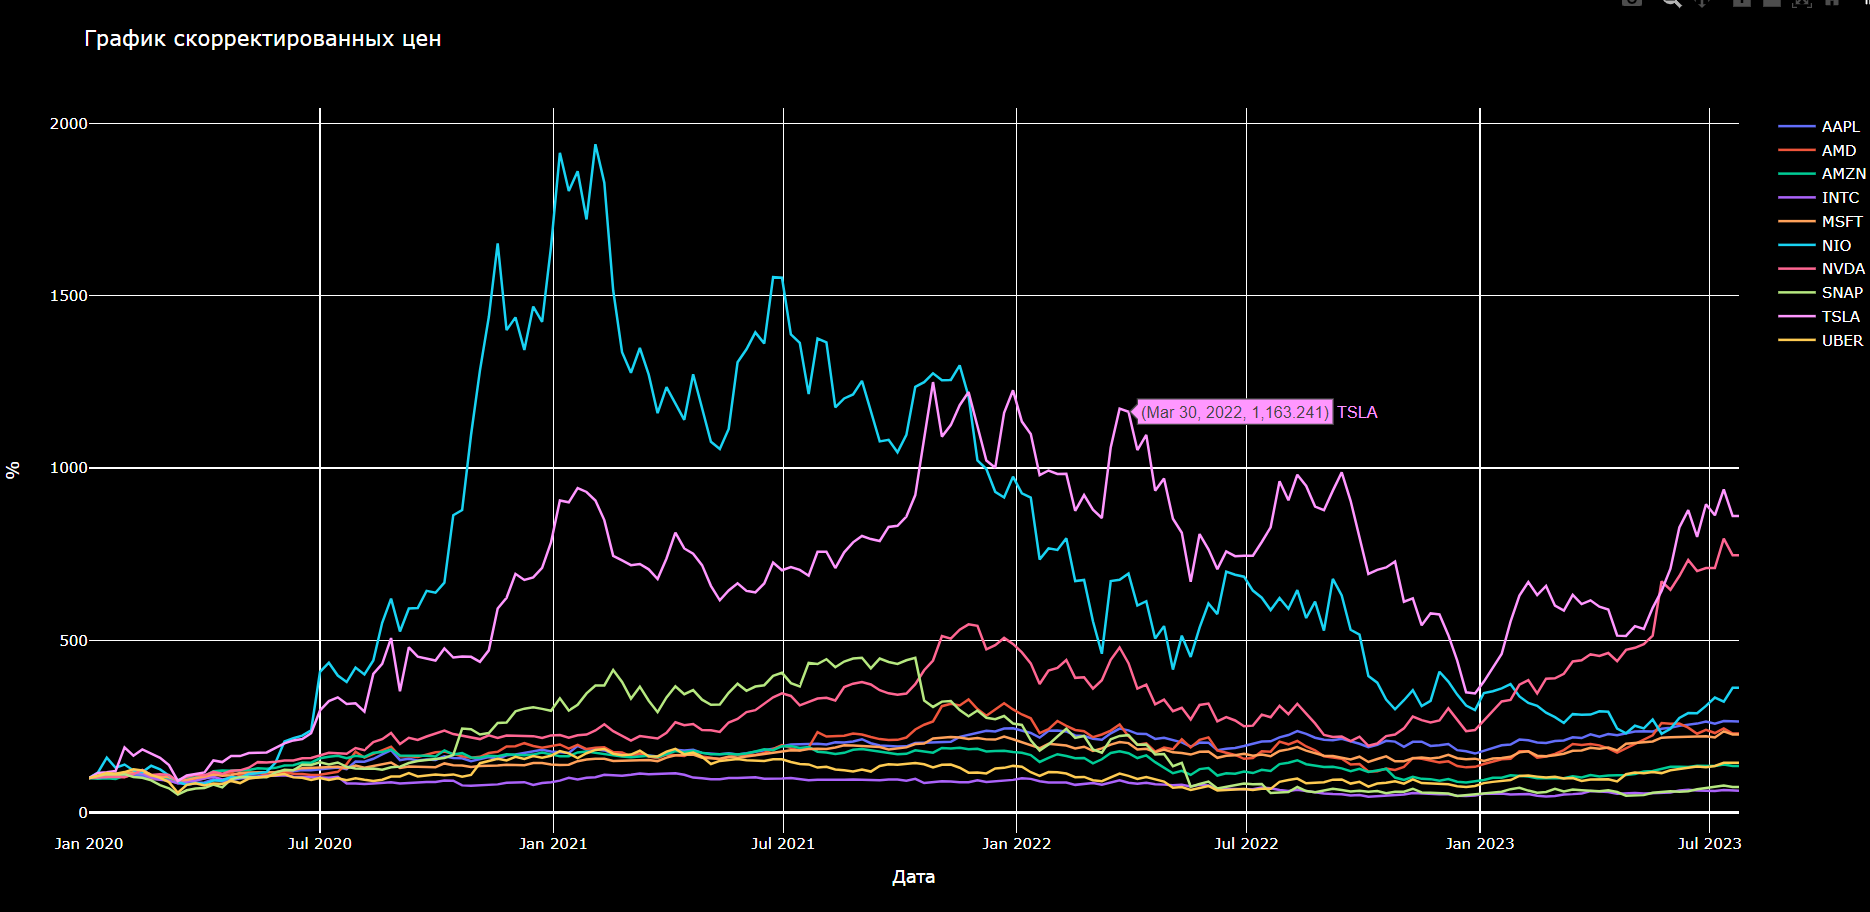

In [ ]:
import os
import requests
import pandas as pd
import json
from datetime import datetime, timezone
from typing import List, Generator
import time
import random

import threading
import concurrent.futures
import queue



def make_tickers_file(tickers: List, file: str = 'tickers.txt') -> None:
    """Создаем файл с тикерами"""
    
    with open(file, 'w') as f:
        f.writelines(ticker + '\n' for ticker in tickers)
        

def get_ticker(file: str = 'tickers.txt') -> Generator[str, None, None]:
    """Генератор тикеров"""
    
    with open(file) as file:
        for line in file:
            ticker = line.strip()
            yield ticker
        

def get_history_data(ticker: str, start_date: str, end_date: str, interval: str = "1wk") -> pd.DataFrame:
    """
    Получает исторические данные для указанного тикера актива.

    :param ticker: str, тикер актива.
    :param start_date: str, дата начала периода в формате 'дд.мм.гг'.
    :param end_date: str, дата окончания периода в формате 'дд.мм.гг'.
    :param interval: str, интервал времени (неделя, день и т.д.) (необязательный, по умолчанию '1wk' - одна неделя).
    :return: DataFrame с историческими данными.
     'high', 'open', 'close', 'volume', 'low', 'adjclose'
    """
    
    per2 = int(datetime.strptime(end_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
    per1 = int(datetime.strptime(start_date, '%d.%m.%y').replace(tzinfo=timezone.utc).timestamp())
    params = {"period1": str(per1), "period2": str(per2),
              "interval": interval, "includeAdjustedClose": "true"}
    url = f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}"
    user_agent_key = "User-Agent"
    user_agent_value = "Mozilla/5.0"
    headers = {user_agent_key: user_agent_value}
    
    history_data = requests.get(url, headers=headers, params=params).json()
    
    data = history_data['chart']['result'][0]['indicators']['quote'][0]
    data['adjclose'] = history_data['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']
    data = pd.DataFrame(data, 
                 index=history_data['chart']['result'][0]['timestamp'])
    time.sleep(random.randint(0, 2))
    print(f'get_history_data for {ticker}')
    if ticker == 'NVDA':
        raise Exception(f'Download Error {ticker}')
    return data


def file_writer(end_data: str, dir_file: str = 'tickers') -> None:
    """Функция-поток для записи файлов из очереди на диск."""
    
    while True:
        data, ticker = file_queue.get()
        end_data = end_data.replace('.', '-')
        filename = f'{ticker.lower()}_{end_data}.csv'
        os.makedirs(dir_file, exist_ok=True)
        data['date'] = data.index
        data.to_csv(os.path.join(dir_file, filename), index=False)
        time.sleep(random.randint(0, 2))
        print(f'{filename} was saved successfully')
        file_queue.task_done()
        
        
def put_task_to_queue_to_save(future, ticker: str) -> None:
    """Добавляем задачу в очередь на запись"""
    data = future.result()
    file_queue.put((data, ticker))


# Указываем временной промежуток    
start_data = '01.01.20'
end_data = '12.12.23'   

# Создаем файл с тикерами
make_tickers_file(['IBM', 'MCD', 'AAPL', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'GOOGL', 'META', 'BRK-B', 'UNH', 'JPM'])

# Создаем очередь для сохранения данных для записи
file_queue = queue.Queue()

# Создаем поток для записи файлов на диск
saver = threading.Thread(target=file_writer, args=(end_data,))
saver.daemon = True
saver.start()

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = dict((executor.submit(get_history_data, ticker, start_data, end_data, '1wk'), ticker) 
                      for ticker in get_ticker())

    for future in concurrent.futures.as_completed(futures):
        exception = future.exception()
        if exception is not None:
            print(f'An error occurred during downloading: {exception}')
            print()
        else:
            put_task_to_queue_to_save(future, ticker=futures[future])
        
    
    # Ожидаем завершения всех задач в очереди перед выходом из программы
    file_queue.join()

In [ ]:
import os
import threading
import time
import pandas as pd
import plotly.graph_objects as go
from typing import List, Generator

            
def read_data(ticker: str, end_data: str,
                  dir_file: str = 'tickers') -> pd.DataFrame:
    """Читаем данные тикера"""
    
    end_data = end_data.replace('.', '-')
    filename = f'{ticker.lower()}_{end_data}.csv'
    data = pd.read_csv(os.path.join(dir_file, filename)) 
    return data
            
            
def add_norm_price(sema: threading.Semaphore, ticker: str, end_data: str,
                  dir_file: str = 'tickers') -> None:
    """Добавяем столбец с нормализованной ценой тикера"""
    
    with sema:
        data = read_data(ticker, end_data)
        data[f'{ticker}_norm_price'] = 100 * data['adjclose'] / data['adjclose'].iloc[0]
        
        end_data = end_data.replace('.', '-')
        filename = f'{ticker.lower()}_{end_data}.csv'
        data.to_csv(os.path.join(dir_file, filename), index=False)
        

def plot_all_prices(ticker: List, end_data: str, dir_file: str = 'tickers', how='pandas') -> None:
    """ Стоим общий график нормализованной цены"""
    
    norm_prices = pd.DataFrame()
    for ticker in tickers:
        data = read_data(ticker, end_data)
        norm_prices = pd.concat([norm_prices, data[f'{ticker}_norm_price']], axis=1)
    norm_prices.index = data['date'].apply(
        lambda t: datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M'))   
    
    if how == 'pandas':
        norm_prices.plot(figsize=(15, 9), title='Normalized Prices', rot=45)
    elif how == 'plotly':
        fig = go.Figure()
        for ticker in tickers:
            fig.add_trace(go.Scatter(x=norm_prices.index, y=norm_prices[f'{ticker}_norm_price'], mode='lines', name=ticker))
        
        fig.update_layout(title='График скорректированных цен', xaxis_title='Дата', yaxis_title='%',
                      plot_bgcolor='black', paper_bgcolor='black', legend_font_color='white',
                      title_font_color='white',  # Изменение цвета заголовка на белый
                      xaxis_title_font_color='white',  # Изменение цвета подписи оси X на белый
                      yaxis_title_font_color='white',  # Изменение цвета подписи оси Y на белый
                      font=dict(color='white'))
        fig.show()


tickers = ['IBM', 'MCD', 'AAPL', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'GOOGL', 'META', 'BRK-B', 'UNH', 'JPM']
end_data = '12.12.23'
thr = []

# Выполняем задачу одновременно 4 потоками
semaphore = threading.Semaphore(4)
for ticker in tickers:
    t = threading.Thread(target=add_norm_price, args=(semaphore, ticker, end_data))
    t.start()
    thr.append(t)
for t in thr:
    t.join()

In [ ]:
plot_all_prices(tickers, end_data, how='pandas')

In [ ]:
plot_all_prices(tickers, end_data, how='plotly')

<a id='group2'></a>

# Многопроцессность в Python. Multiprocessing.

# https://stepik.org/course/188951/syllabus

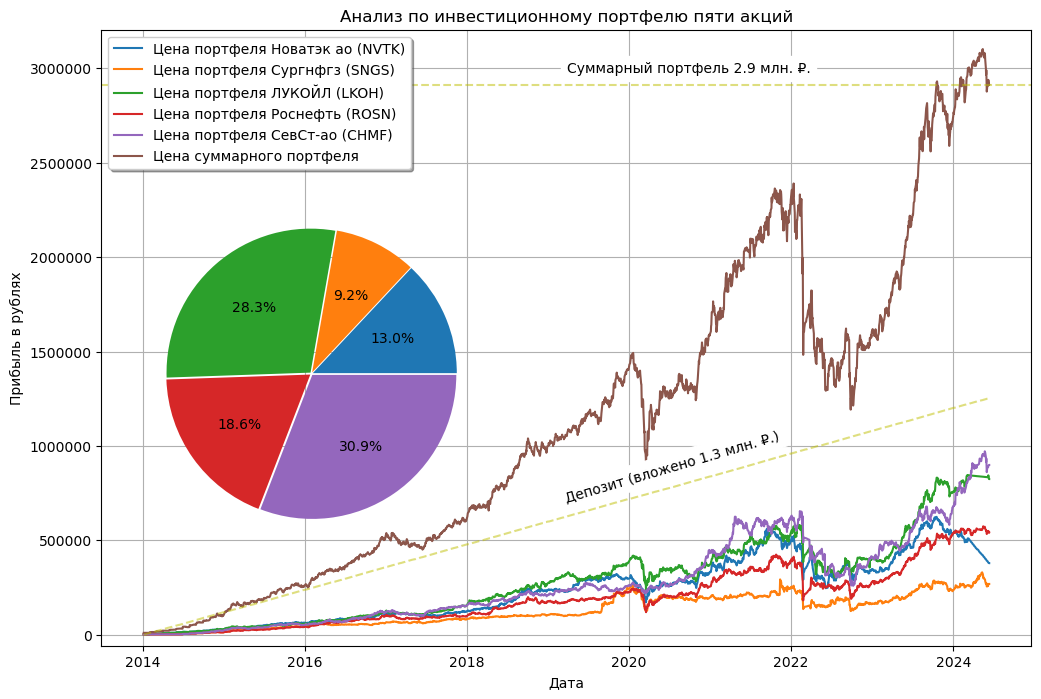

In [1]:
# %%time
import os
import logging
import requests
import random
import datetime
import pandas as pd
import numpy as np
from typing import Text, List, Generator, Optional, Callable, Union
from functools import wraps
import multiprocessing
import concurrent.futures
import matplotlib.pyplot as plt

logger = multiprocessing.get_logger()


def log_init(logger: multiprocessing.get_logger = logger, 
             log_file_info: str = 'logs_info.txt', log_file_error: str = 'logs_err.txt', 
             out_stream: bool = 0, out_file_info: bool = 1, out_file_error: bool = 1) -> multiprocessing.get_logger:
    """ Настраиваем логгер """
    
    logger.setLevel(logging.INFO)
    log_formatter = logging.Formatter('{processName}, {asctime}, {message}', style='{')
    
    # Вывод в консоль
    if out_stream:
        stream_handler = logging.StreamHandler()
        stream_handler.setFormatter(log_formatter)
        logger.addHandler(stream_handler)
    
    # INFO Вывод в файл
    if out_file_info:
        file_handler_info = logging.FileHandler(log_file_info, mode='w', encoding='UTF-8')
        file_handler_info.setFormatter(log_formatter)
        file_handler_info.setLevel(logging.INFO)
        logger.addHandler(file_handler_info)
    
    # ERROR Вывод в файл
    if out_file_error:
        file_handler_error = logging.FileHandler(log_file_error, mode='w', encoding='UTF-8')
        file_handler_error.setFormatter(log_formatter)
        file_handler_error.setLevel(logging.ERROR)
        logger.addHandler(file_handler_error)
    return logger


def log_decor(func: Callable, logger: multiprocessing.get_logger = logger): 
    """Логгер-декоратор"""
    
    @wraps(func)
    def wrapper(*args, **kwargs):
        # получаем имя тикера из функции
        try:
            if isinstance(args[0], str) and args[0] == args[0].upper():
                ticker = f' ({args[0]})'
            else:
                ticker = ''
        except:
            ticker = ''
            
        # пробуем запустить функцию
        try:
            f = func(*args, **kwargs)
            logger.info(f'{func.__name__}{ticker} is done.')
            return f
        except Exception as exception:
            logger.error(f'{func.__name__}{ticker} is failed. Exception: {exception}.')
            raise exception
    return wrapper


@log_decor
def make_tickers_file(tickers: Optional[Text] = None, file: str = 'tickers.txt') -> None:
    """Создаем файл с тикерами компаний"""
    
    if not tickers:
        tickers = """SBER - Сбербанк
        SBERP - Сбербанк, привилегированные акции
        LKOH - Лукойл
        NVTK - Новатэк
        SIBN - Газпромнефть
        SNGS - Сургутнефтегаз
        SNGSP - Сургутнефтегаз, привилегированные акции
        PLZL - Полюс золото
        CHMF - Северсталь
        PHOR - ФосАгро
        AKRN - Акрон
        MGNT - Магнит
        GAZP - ГАЗПРОМ ао
        VTBR - ВТБ ао
        AFLT - Аэрофлот
        TATN - Татнфт 3ао
        ROSN - Роснефть
        MTSS - МТС-ао
        FEES - Россети
        KMAZ - КАМАЗ
        MSNG - +МосЭнерго
        ALRS - АЛРОСА ао
        AFKS - Система ао
        MOEX - Московская биржа"""
    
    with open(file, 'w') as f:
        f.write(tickers)


@log_decor
def get_ticker(file: str = 'tickers.txt', verbose=False) -> Generator:
    """Генератор 5ти случайных тикеров"""
    
    with open(file) as file:
        file = random.sample(list(file), k=5)
        for line in file:
            if verbose:
                print(line)
            ticker = line.strip().split(' - ')[0]
            yield ticker


@log_decor
def get_time_data_limits(ticker: str) -> List:
    """Получаем временной интервал для тикера"""
    url = (f'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/'
           f'{ticker}/dates.json')
    response = requests.get(url).json()
    time_data_limits = response['dates']['data'][0]
    return time_data_limits


@log_decor    
def get_prices(ticker: str, start: str, end: str, verbose=False) -> List[List]:
    """Запрос исторических цен"""

    start = datetime.datetime.strptime(start, "%Y-%m-%d").date()
    end = datetime.datetime.strptime(end, "%Y-%m-%d").date()
    if verbose:
        print(f'{ticker=}, {start=}, {end=}')
    start_date = start # save start for test check
    prices = []
    next_start = start
    while (next_start := next_start + datetime.timedelta(days=100)) <= end:
        url = (f'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/'
               f'{ticker}.json?from={start}&till={next_start}')
        response = requests.get(url).json()
        prices.extend(response['history']['data'])
        start = next_start + datetime.timedelta(days=1)
    columns = [column.lower() for column in response['history']['columns']]
    
    if (next_start - end).days > 0:
        next_start = end - datetime.timedelta(days=(next_start - end).days - 1)
        url = (f'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/'
               f'{ticker}.json?from={next_start}&till={end}')
        response = requests.get(url).json()
        prices.extend(response['history']['data'])
    
    assert len(set([tuple(item) for item in prices])) == len(prices), f'check duplicate {ticker}' 
    assert str(start_date) == prices[0][1] and str(end) == prices[-1][1], f'check lenght {ticker}' 
    return prices, columns


@log_decor
def get_dividends(ticker: str) -> List[List]:
    """Запрос дивидендных выплат"""

    url = f'http://iss.moex.com/iss/securities/{ticker}/dividends.json'
    response = requests.get(url).json()
    dividends = response['dividends']['data']
    columns = [column.lower() for column in response['dividends']['columns']]
    return dividends, columns    


@log_decor
def save_data(ticker: str, 
              prices: List[List], prices_columns: List, 
              dividends: List[List], dividends_columns: List,
              file: str = 'tickers_data.csv') -> None:
    """
    Присоединяем к данным тикера данные по диведентам (по общей дате) и
    сорраняем в единый csv файл в формате Pandas DataFrame.
    """
    
    prices = pd.DataFrame(prices, columns=prices_columns)
    prices['tradedate'] = pd.to_datetime(prices['tradedate'])
    dividends = pd.DataFrame(dividends, columns=dividends_columns)
    dividends['registryclosedate'] = pd.to_datetime(dividends['registryclosedate'])
    
    assert prices['secid'].iloc[0] == dividends['secid'].iloc[0] == ticker, f'check ticker name {ticker}'
    
    data = pd.merge(left=prices[['secid', 'tradedate', 'shortname', 'volume', 'close']],
                    right=dividends[['registryclosedate', 'value', 'currencyid']],
                    how='left',
                    left_on='tradedate',
                    right_on='registryclosedate')
    data.index = pd.to_datetime(data['tradedate'])
    data = (data[['secid', 'shortname', 'volume', 'close', 'value', 'currencyid']]
            .rename(columns={'value': 'dividends_value'}))
    data.to_csv(f'{ticker}_tickers_data.csv')

    
@log_decor
def pipeline(ticker: str) ->  str:
    """
    Последовательно выполняем: 
      - получаем данные о временных лимитах тикера
      - получаем все исторические данные тикера
      - получаем данные о дивидендах
      - преобразуем в единый Pandas DataFrame и сохраняем файл.
    """
    
    start_data, end_data = get_time_data_limits(ticker)
    ticker_prices, ticker_columns = get_prices(ticker, start_data, end_data)
    dividends_prices, dividends_columns = get_dividends(ticker)
    save_data(ticker, ticker_prices, ticker_columns, dividends_prices, dividends_columns)
    logger.info(f'{ticker} is downloaded and saved.')
    return ticker


@log_decor
def calc_tiсker_investment_portfolio(
            ticker: str,
            tickers_data: multiprocessing.Manager().list) ->  None:
    """
    Делаем расчет инвестиционного портфеля для отдельной акции:
    - каждый месяц покупаем акции на 2000 руб.
    - и покупаем акции на полученные дивиденды 
    """

    # загружаем данные акции
    share = pd.read_csv(f'{ticker}_tickers_data.csv')

    # переводим дату в datetime 
    share['tradedate'] = pd.to_datetime(share['tradedate'])
    share = share[share.tradedate >= '2014-1-1']
    
    # заменяем пропуски дивидендов нулями
    share[['dividends_value', 'currencyid']] = share[['dividends_value', 'currencyid']].fillna(0)
    
    # заменяем пропуски close линейной интерполяцией
    share['close'] = share['close'].interpolate(method='linear')
    share = share.dropna()
    
    # в начале каждого месяца покупаем акции каждого тикера на 10000 / 5 = 2000 руб 
    add_rub = 10000 / 5
    share['каждый месяц пополняем'] = (share['tradedate'].dt.month != share['tradedate'].dt.month.shift()) * add_rub
    
    # расчет количества акций
    number_of_shares = [0] * len(share)
    number_of_shares[0] = add_rub / share['close'].iloc[0]
    for i, columns in enumerate(share.values[1:], start=1):
        price_share_now = columns[4] # цена close
        dividends_value = columns[5] # дивиденды на акцию
        add_money_month = columns[7] # ежемесячная покупка
        
        # покупаем акции на дивиденды
        if dividends_value != 0:
            number_of_shares[i] = (number_of_shares[i-1] + 
                                  (number_of_shares[i-1] * dividends_value) / price_share_prev)
        
        # покупаем акции ежемесячно на 2000р 
        if add_money_month != 0:
            add = add_money_month / price_share_now
            # складываем с акциями от дивидендов если они были в этот день
            if dividends_value != 0:
                number_of_shares[i] = number_of_shares[i] + add
            else:
                number_of_shares[i] = number_of_shares[i-1] + add 
            
        # или количество акций остается прежним
        if add_money_month == 0 and dividends_value == 0:
            number_of_shares[i] = number_of_shares[i-1] 

        price_share_prev = price_share_now
        
    share['кол. акций'] = number_of_shares
    
    company_name = share['shortname'].iloc[0]
    share[f'Цена портфеля {company_name} ({ticker})'] = share['кол. акций'] * share['close']
    share = share.set_index('tradedate')
    
    # сохраняем данные в общий список
    tickers_data.append(share)


@log_decor
def investment_final_report(shares: List[str], show=True) ->  pd.DataFrame:
    """
    Объединяем инвестиционные портфели пяти акций.
    Строим график по каждой акции и общему портфелю. Считаем доли.
    """
    
    # создаем датафрейм в который будем добавлять портфели по акциям
    results = pd.DataFrame(index=pd.date_range(start=datetime.datetime.strptime('2014-1-1', "%Y-%m-%d"), 
                                               # end=datetime.datetime.strptime('2024-1-1', "%Y-%m-%d"),
                                               end=datetime.datetime.now(), 
                                               freq='D'))
    for share in shares:
        ticker = share['secid'].iloc[0]
        company = share['shortname'].iloc[0]
        results = results.join(share[[f'Цена портфеля {company} ({ticker})']], how='left')
    
    # убираем даты где небыло никаких данных, заменяем пропуски линейной интерполяцией 
    results = results.dropna(how='all').interpolate(method='linear')
    
    # если в начале периода акция еще не торговалась заполняем ценой депозита на одну акцию 2000р
    results = results.fillna(2000)
    
    # добавляем суммарный портфель по всем выбранным тикерам
    results[f'Цена cуммарного портфеля'] = results.sum(axis=1)

    
    # строим графики портфелей
    if show:
        fig = plt.figure(figsize=(12, 8))
        plt.plot(results)

        # добавляем линию суммы вложенных средств (вносилось 10000р каждый месяц)
        deposit = (results.index[-1] - results.index[0]).days / 30.4 * 10000
        x = results.index 
        y = np.linspace(0, deposit, len(results))
        plt.plot(x, y, color='y', linestyle='--', alpha=0.5)
        plt.text(x=x[len(x) // 2], y=y[len(y) // 2] + int(y[len(y) // 2]*0.1), 
                 s=f'Депозит (вложено {deposit/1e6:.01f} млн. ₽.)', 
                 ha='left', va='bottom',
                 transform_rotates_text=True, 
                 rotation=np.rad2deg(np.arctan2(y[-1], len(results)+1000)), 
                 rotation_mode='anchor', 
                 backgroundcolor='w')
        
        # добавляем линию суммарного профита
        total_profit = results.iloc[-1][-1]
        plt.axhline(y=total_profit, color='y', linestyle='--', alpha=0.5)
        plt.text(x=results.index[len(results) // 2], 
                 y=total_profit + int(total_profit*0.03), 
                 s=f'Суммарный портфель {total_profit/1e6:.01f} млн. ₽.', 
                 verticalalignment='center', backgroundcolor='w')
        
        plt.ticklabel_format(axis='y', style='plain', scilimits=(6, 6))
        plt.ylim(-int(total_profit*0.02), total_profit + int(total_profit*0.1))
        plt.xlabel('Дата')
        plt.ylabel('Прибыль в рублях')
        plt.title('Анализ по инвестиционному портфелю пяти акций')
        plt.legend(results.columns, loc='upper left', shadow=True, framealpha=1)
        plt.grid()
        plt.axes([0.15, 0.2, 0.3, 0.5])
        plt.pie(results.iloc[-1][:-1], autopct='%1.1f%%', explode=[0.01, 0.01, 0.01, 0.01, 0.01])
        plt.show()
    
    return results


if __name__ == '__main__':
    # создаем логгер
    logger = log_init()

    # создаем файл тикерами ценных бумаг
    make_tickers_file()

    # создаем список для сбора данных по тикерам
    tickers_data = multiprocessing.Manager().list()

    # запускаем обработку тикеров в многопроцессорном режиме
    with concurrent.futures.ProcessPoolExecutor() as executor:
        redownload = False
        futures = {}
        for ticker in get_ticker():
            if redownload or not os.path.isfile(f'{ticker}_tickers_data.csv'):
                # скачиваем и сохраняем данные тикера
                future = executor.submit(pipeline, ticker)
                # по готовности запускаем расчет стоимости портфеля для тикера
                future.add_done_callback(
                    lambda future: calc_tiсker_investment_portfolio(future.result(), tickers_data))
            else:
                # запускаем расчет стоимость портфеля для тикера если он уже скачен
                future = executor.submit(calc_tiсker_investment_portfolio, ticker, tickers_data)
            futures[future] = ticker
    # ждем результата
    concurrent.futures.wait(futures)

    # делаем финальный отчет стоимости портфелей для всех тикеров
    results = investment_final_report(tickers_data, show=True)


In [25]:
# с очередью задач

import logging
import os
import requests
from PIL import Image
from time import perf_counter
import concurrent.futures
import multiprocessing


# Создаем логгер
logger = multiprocessing.get_logger()
logger.setLevel(logging.INFO)

LOG_FORMAT = '{processName}, {asctime}, {message}'
LOG_FILE_INFO  = 'logs_info.txt'
LOG_FILE_ERROR = 'logs_err.txt'
log_formatter = logging.Formatter(LOG_FORMAT, style='{')

# Вывод в консоль
stream_handler = logging.StreamHandler()
stream_handler.setFormatter(log_formatter)
logger.addHandler(stream_handler)

# INFO Вывод в файл
file_handler_info = logging.FileHandler(LOG_FILE_INFO, mode='w')
file_handler_info.setFormatter(log_formatter)
file_handler_info.setLevel(logging.INFO)
logger.addHandler(file_handler_info)

# ERROR Вывод в файл
file_handler_error = logging.FileHandler(LOG_FILE_ERROR, mode='w')
file_handler_error.setFormatter(log_formatter)
file_handler_error.setLevel(logging.ERROR)
logger.addHandler(file_handler_error)


def download_images_and_save(url, original_dir, redownload=False):
    try:
        # Получаем имя файла из URL-адреса
        filename = url.split('/')[-1]
    
        # Куда сохраняем исходную картинку
        original_path = os.path.join(original_dir, filename)
        
        # Скачиваем по ссылке 
        if redownload or not os.path.isfile(original_path):
            response = requests.get(url, stream=True)
            response.raise_for_status()
            with open(original_path, 'wb') as file:
                for chunk in response.iter_content(chunk_size=4096):
                    file.write(chunk)
                    
        size = os.path.getsize(original_path) // 1024
        logger.info(f'{original_path} is saved({size=}Kb).')
        return original_path
        
    except requests.exceptions.RequestException as err:
        logger.error(f"Ошибка {err} при загрузке URL-адреса {url}")
    except IOError as err:
        logger.error(f"Ошибка {err} при работе с файлом {filename}")
    except Exception as err:
        logger.error(f"Ошибка {err} при работе функции download_image")


def resize_images_and_save(works_queue):
    while (task := works_queue.get()) != 'finish':
        original_path, resized_dir, max_width, max_height = task
        try:
            # Открываем исходную картинку с помощью PIL
            image = Image.open(original_path)
        
            # Масштабируем картинку до желаемых размеров
            image.thumbnail((max_width, max_height))
        
            # Создаем новое имя для уменьшенной копии
            filename = original_path.split('/')[-1]
            resized_filename = f"resized_{filename}"
        
            # Сохраняем уменьшенную копию картинки в папке "resized"
            resized_path = os.path.join(resized_dir, resized_filename)
            image.save(resized_path)
            logger.info(f"Успешно создано уменьшенное изображение: {original_path}")
            
        except Exception as err:
            logger.error(f"Ошибка при обработке файла: {original_path}")
            logger.error(f"Ошибка: {err}")

    if task == 'finish':
        works_queue.put('finish')
        
    
if __name__ == "__main__":

    urls = [
        'https://apod.nasa.gov/apod/image/2310/IC63_GruntzBax.jpg',
        'https://apod.nasa.gov/apod/image/2310/2P_Encke_2023_08_24JuneLake_California_USA_DEBartlett.jpg',
        'https://apod.nasa.gov/apod/image/2310/20231023_orionids_in_taurus_1440b.jpg',
        'https://apod.nasa.gov/apod/image/2310/Arp87_HubblePathak_2512.jpg',
        'https://apod.nasa.gov/apod/image/2310/C2023H2LemmonGalaxies.jpg',
        'https://apod.nasa.gov/apod/image/2310/WesternVeil_Wu_2974.jpg',
        'https://apod.nasa.gov/apod/image/2310/M33_Triangulum.jpg',
        'https://apod.nasa.gov/apod/image/2310/MuCephei_apod.jpg',
        'https://apod.nasa.gov/apod/image/2310/Hourglass_HubblePathak_1080.jpg',
        'https://apod.nasa.gov/apod/image/2310/HiResSprites_Escurat_3000.jpg',
        'https://apod.nasa.gov/apod/image/2309/M8-Mos-SL10-DCPrgb-st-154-cC-cr.jpg',
        'https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_93.jpg',
        'https://apod.nasa.gov/apod/image/2309/Arp142_HubbleChakrabarti_2627.jpg',
        'https://apod.nasa.gov/apod/image/2309/HH211_webb_3846.jpg',
        'https://apod.nasa.gov/apod/image/2309/LRGBHa23_n7331r.jpg',
        'https://apod.nasa.gov/apod/image/2309/PolarRing_Askap_960.jpg',
        'https://apod.nasa.gov/apod/image/2309/STSCI-HST-abell370_1797x2000.jpg'
    ]
    

    # Создаем папки для оригинальных картинок и уменьшенных версий
    output_directory = "./nasa_foto"
    original_dir = os.path.join(output_directory, "original")
    resized_dir = os.path.join(output_directory, "resized")
    os.makedirs(original_dir, exist_ok=True)
    os.makedirs(resized_dir, exist_ok=True)
    # задаем параметры картинок
    max_width = 600
    max_height = 400
    
    start_time = perf_counter()
    
    # создаем очередь задач
    works_queue = multiprocessing.Queue()
    
    # создаем обработчики задач
    worker1 = multiprocessing.Process(target=resize_images_and_save, args=(works_queue,))
    worker2 = multiprocessing.Process(target=resize_images_and_save, args=(works_queue,))
    worker1.start()
    worker2.start()

    # скачиваем картинки в многопоточном режиме
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {}
        for url in urls:
            future = executor.submit(download_images_and_save, url, original_dir)
            futures[future] = url

    # по мере готовности скачивания, запускаем обработку файлов в многопроцессорном режиме
    processes = []
    for future in concurrent.futures.as_completed(futures):
        if future.exception() is None:
            works_queue.put((future.result(), resized_dir, max_width, max_height))
    works_queue.put('finish') 
    
    # ждем окончания обработки
    worker1.join()
    worker2.join()
    
    print(f"ALL DONE, {perf_counter() - start_time}")
    
    # смотрим логи
    with open("logs_info.txt") as f:
        print(f.read())
    with open("logs_err.txt") as f:
        print(f.read())

MainProcess, 2024-06-12 21:51:02,465, ./nasa_foto/original/IC63_GruntzBax.jpg is saved(size=5630Kb).
MainProcess, 2024-06-12 21:51:02,466, ./nasa_foto/original/2P_Encke_2023_08_24JuneLake_California_USA_DEBartlett.jpg is saved(size=1481Kb).
MainProcess, 2024-06-12 21:51:02,467, ./nasa_foto/original/20231023_orionids_in_taurus_1440b.jpg is saved(size=871Kb).
MainProcess, 2024-06-12 21:51:02,468, ./nasa_foto/original/Arp87_HubblePathak_2512.jpg is saved(size=283Kb).
MainProcess, 2024-06-12 21:51:02,471, ./nasa_foto/original/MuCephei_apod.jpg is saved(size=5031Kb).
MainProcess, 2024-06-12 21:51:02,471, ./nasa_foto/original/WesternVeil_Wu_2974.jpg is saved(size=2946Kb).
MainProcess, 2024-06-12 21:51:02,472, ./nasa_foto/original/C2023H2LemmonGalaxies.jpg is saved(size=1639Kb).
MainProcess, 2024-06-12 21:51:02,472, ./nasa_foto/original/M33_Triangulum.jpg is saved(size=2330Kb).
MainProcess, 2024-06-12 21:51:02,472, ./nasa_foto/original/M8-Mos-SL10-DCPrgb-st-154-cC-cr.jpg is saved(size=10068Kb

ALL DONE, 1.471505020002951
MainProcess, 2024-06-12 21:51:02,465, ./nasa_foto/original/IC63_GruntzBax.jpg is saved(size=5630Kb).
MainProcess, 2024-06-12 21:51:02,466, ./nasa_foto/original/2P_Encke_2023_08_24JuneLake_California_USA_DEBartlett.jpg is saved(size=1481Kb).
MainProcess, 2024-06-12 21:51:02,467, ./nasa_foto/original/20231023_orionids_in_taurus_1440b.jpg is saved(size=871Kb).
MainProcess, 2024-06-12 21:51:02,468, ./nasa_foto/original/Arp87_HubblePathak_2512.jpg is saved(size=283Kb).
MainProcess, 2024-06-12 21:51:02,471, ./nasa_foto/original/MuCephei_apod.jpg is saved(size=5031Kb).
MainProcess, 2024-06-12 21:51:02,471, ./nasa_foto/original/WesternVeil_Wu_2974.jpg is saved(size=2946Kb).
MainProcess, 2024-06-12 21:51:02,472, ./nasa_foto/original/C2023H2LemmonGalaxies.jpg is saved(size=1639Kb).
MainProcess, 2024-06-12 21:51:02,472, ./nasa_foto/original/M33_Triangulum.jpg is saved(size=2330Kb).
MainProcess, 2024-06-12 21:51:02,472, ./nasa_foto/original/M8-Mos-SL10-DCPrgb-st-154-cC-

In [8]:
import os
import requests
from PIL import Image  # библиотека для работы с изображениями, Вы можете использовать другую
from time import perf_counter


def download_and_resize_images(image_urls, output_directory, max_width, max_height):
    # Создаем папки для оригинальных картинок и уменьшенных версий
    original_dir = os.path.join(output_directory, "original")
    resized_dir = os.path.join(output_directory, "resized")
    os.makedirs(original_dir, exist_ok=True)
    os.makedirs(resized_dir, exist_ok=True)

    for url in image_urls:
        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()

            # Получаем имя файла из URL-адреса
            filename = url.split('/')[-1]

            # Сохраняем исходную картинку в папку "original"
            original_path = os.path.join(original_dir, filename)
            with open(original_path, 'wb') as file:
                for chunk in response.iter_content(chunk_size=4096):
                    file.write(chunk)

            # Открываем исходную картинку с помощью PIL
            image = Image.open(original_path)

            # Масштабируем картинку до желаемых размеров
            image.thumbnail((max_width, max_height))

            # Создаем новое имя для уменьшенной копии
            resized_filename = f"resized_{filename}"

            # Сохраняем уменьшенную копию картинки в папке "resized"
            resized_path = os.path.join(resized_dir, resized_filename)
            image.save(resized_path)
            print(f"Успешно создано уменьшенное изображение: {resized_filename}")

        except requests.exceptions.RequestException as e:
            print(f"Ошибка при обработке URL-адреса: {url}")
            print(f"Ошибка: {e}")
        except IOError as e:
            print(f"Ошибка при обработке файла: {filename}")
            print(f"Ошибка: {e}")


urls = [
    'https://apod.nasa.gov/apod/image/2310/IC63_GruntzBax.jpg',
    'https://apod.nasa.gov/apod/image/2310/2P_Encke_2023_08_24JuneLake_California_USA_DEBartlett.jpg',
    'https://apod.nasa.gov/apod/image/2310/20231023_orionids_in_taurus_1440b.jpg',
    'https://apod.nasa.gov/apod/image/2310/Arp87_HubblePathak_2512.jpg',
    'https://apod.nasa.gov/apod/image/2310/C2023H2LemmonGalaxies.jpg',
    'https://apod.nasa.gov/apod/image/2310/WesternVeil_Wu_2974.jpg',
    'https://apod.nasa.gov/apod/image/2310/M33_Triangulum.jpg',
    'https://apod.nasa.gov/apod/image/2310/MuCephei_apod.jpg',
    'https://apod.nasa.gov/apod/image/2310/Hourglass_HubblePathak_1080.jpg',
    'https://apod.nasa.gov/apod/image/2310/HiResSprites_Escurat_3000.jpg',
    'https://apod.nasa.gov/apod/image/2309/M8-Mos-SL10-DCPrgb-st-154-cC-cr.jpg',
    'https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_93.jpg',
    'https://apod.nasa.gov/apod/image/2309/Arp142_HubbleChakrabarti_2627.jpg',
    'https://apod.nasa.gov/apod/image/2309/HH211_webb_3846.jpg',
    'https://apod.nasa.gov/apod/image/2309/LRGBHa23_n7331r.jpg',
    'https://apod.nasa.gov/apod/image/2309/PolarRing_Askap_960.jpg',
    'https://apod.nasa.gov/apod/image/2309/STSCI-HST-abell370_1797x2000.jpg'
]
output_directory = "./nasa_foto"
max_width = 600
max_height = 400

start_time = perf_counter()
download_and_resize_images(urls, output_directory, max_width, max_height)
print(f"ALL DONE, {perf_counter() - start_time}")


Успешно создано уменьшенное изображение: resized_IC63_GruntzBax.jpg
Успешно создано уменьшенное изображение: resized_2P_Encke_2023_08_24JuneLake_California_USA_DEBartlett.jpg
Успешно создано уменьшенное изображение: resized_20231023_orionids_in_taurus_1440b.jpg
Успешно создано уменьшенное изображение: resized_Arp87_HubblePathak_2512.jpg
Успешно создано уменьшенное изображение: resized_C2023H2LemmonGalaxies.jpg
Успешно создано уменьшенное изображение: resized_WesternVeil_Wu_2974.jpg
Успешно создано уменьшенное изображение: resized_M33_Triangulum.jpg
Успешно создано уменьшенное изображение: resized_MuCephei_apod.jpg
Успешно создано уменьшенное изображение: resized_Hourglass_HubblePathak_1080.jpg
Успешно создано уменьшенное изображение: resized_HiResSprites_Escurat_3000.jpg
Успешно создано уменьшенное изображение: resized_M8-Mos-SL10-DCPrgb-st-154-cC-cr.jpg
Ошибка при обработке URL-адреса: https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_93.jpg
Ошибка: 404 Client Error: Not Found fo

In [9]:
import logging
import os
import requests
from PIL import Image
from time import perf_counter
import concurrent.futures
import multiprocessing


# Создаем логгер
logger = multiprocessing.get_logger()
logger.setLevel(logging.INFO)

LOG_FORMAT = '{processName}, {asctime}, {message}'
LOG_FILE_INFO  = 'logs_info.txt'
LOG_FILE_ERROR = 'logs_err.txt'
log_formatter = logging.Formatter(LOG_FORMAT, style='{')

# Вывод в консоль
stream_handler = logging.StreamHandler()
stream_handler.setFormatter(log_formatter)
logger.addHandler(stream_handler)

# INFO Вывод в файл
file_handler_info = logging.FileHandler(LOG_FILE_INFO, mode='w')
file_handler_info.setFormatter(log_formatter)
file_handler_info.setLevel(logging.INFO)
logger.addHandler(file_handler_info)

# ERROR Вывод в файл
file_handler_error = logging.FileHandler(LOG_FILE_ERROR, mode='w')
file_handler_error.setFormatter(log_formatter)
file_handler_error.setLevel(logging.ERROR)
logger.addHandler(file_handler_error)


def download_images_and_save(url, original_dir, redownload=False):
    # Получаем имя файла из URL-адреса
    filename = url.split('/')[-1]

    # Куда сохраняем исходную картинку
    original_path = os.path.join(original_dir, filename)
    
    # Скачиваем по ссылке 
    if redownload or not os.path.isfile(original_path):
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(original_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=4096):
                file.write(chunk)
                
    size = os.path.getsize(original_path) // 1024
    logger.info(f'{original_path} is saved({size=}Kb).')
    return original_path


def resize_images_and_save(original_path, resized_dir, max_width, max_height):
    try:
        # Открываем исходную картинку с помощью PIL
        image = Image.open(original_path)
    
        # Масштабируем картинку до желаемых размеров
        image.thumbnail((max_width, max_height))
    
        # Создаем новое имя для уменьшенной копии
        filename = original_path.split('/')[-1]
        resized_filename = f"resized_{filename}"
    
        # Сохраняем уменьшенную копию картинки в папке "resized"
        resized_path = os.path.join(resized_dir, resized_filename)
        image.save(resized_path)
        logger.info(f"Успешно создано уменьшенное изображение: {original_path}")
    except Exception as err:
        logger.error(f"Ошибка при обработке файла: {original_path}")
        logger.error(f"Ошибка: {err}")
        
    
if __name__ == "__main__":

    urls = [
        'https://apod.nasa.gov/apod/image/2310/IC63_GruntzBax.jpg',
        'https://apod.nasa.gov/apod/image/2310/2P_Encke_2023_08_24JuneLake_California_USA_DEBartlett.jpg',
        'https://apod.nasa.gov/apod/image/2310/20231023_orionids_in_taurus_1440b.jpg',
        'https://apod.nasa.gov/apod/image/2310/Arp87_HubblePathak_2512.jpg',
        'https://apod.nasa.gov/apod/image/2310/C2023H2LemmonGalaxies.jpg',
        'https://apod.nasa.gov/apod/image/2310/WesternVeil_Wu_2974.jpg',
        'https://apod.nasa.gov/apod/image/2310/M33_Triangulum.jpg',
        'https://apod.nasa.gov/apod/image/2310/MuCephei_apod.jpg',
        'https://apod.nasa.gov/apod/image/2310/Hourglass_HubblePathak_1080.jpg',
        'https://apod.nasa.gov/apod/image/2310/HiResSprites_Escurat_3000.jpg',
        'https://apod.nasa.gov/apod/image/2309/M8-Mos-SL10-DCPrgb-st-154-cC-cr.jpg',
        'https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_93.jpg',
        'https://apod.nasa.gov/apod/image/2309/Arp142_HubbleChakrabarti_2627.jpg',
        'https://apod.nasa.gov/apod/image/2309/HH211_webb_3846.jpg',
        'https://apod.nasa.gov/apod/image/2309/LRGBHa23_n7331r.jpg',
        'https://apod.nasa.gov/apod/image/2309/PolarRing_Askap_960.jpg',
        'https://apod.nasa.gov/apod/image/2309/STSCI-HST-abell370_1797x2000.jpg'
    ]
    

    # Создаем папки для оригинальных картинок и уменьшенных версий
    output_directory = "./nasa_foto"
    original_dir = os.path.join(output_directory, "original")
    resized_dir = os.path.join(output_directory, "resized")
    os.makedirs(original_dir, exist_ok=True)
    os.makedirs(resized_dir, exist_ok=True)
    # задаем параметры картинок
    max_width = 600
    max_height = 400
    
    start_time = perf_counter()

    # скачиваем картинки в многопоточном режиме
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {}
        for url in urls:
            future = executor.submit(download_images_and_save, url, original_dir)
            futures[future] = url

    # по мере готовности скачивания, запускаем обработку файлов в многопроцессорном режиме
    processes = []
    for future in concurrent.futures.as_completed(futures):
        exception = future.exception()
        if exception is not None:
            if isinstance(exception, requests.exceptions.RequestException):
                logger.error(f"Ошибка при обработке URL-адреса: {futures[future]}")
                logger.error(f"Ошибка: {exception}")
            else:
                logger.error(f'Downloading error: {exception}')
        else:
            processes.append(
            multiprocessing.Process(target=resize_images_and_save, 
                                    args=(future.result(), resized_dir, max_width, max_height)))
            processes[-1].start()
    
    # ждем окончания обработки
    [process.join() for process in processes]
    
    print(f"ALL DONE, {perf_counter() - start_time}")
    
    # смотрим логи
    with open("logs.txt") as f:
        print(f.read())
    with open("log_errors.txt") as f:
        print(f.read())

MainProcess, 2024-06-08 16:18:44,379, ./nasa_foto/original/IC63_GruntzBax.jpg is saved(size=5630Kb).
MainProcess, 2024-06-08 16:18:44,379, ./nasa_foto/original/IC63_GruntzBax.jpg is saved(size=5630Kb).
MainProcess, 2024-06-08 16:18:44,380, ./nasa_foto/original/Arp87_HubblePathak_2512.jpg is saved(size=283Kb).
MainProcess, 2024-06-08 16:18:44,381, ./nasa_foto/original/20231023_orionids_in_taurus_1440b.jpg is saved(size=871Kb).
MainProcess, 2024-06-08 16:18:44,380, ./nasa_foto/original/Arp87_HubblePathak_2512.jpg is saved(size=283Kb).
MainProcess, 2024-06-08 16:18:44,379, ./nasa_foto/original/IC63_GruntzBax.jpg is saved(size=5630Kb).
MainProcess, 2024-06-08 16:18:44,381, ./nasa_foto/original/2P_Encke_2023_08_24JuneLake_California_USA_DEBartlett.jpg is saved(size=1481Kb).
MainProcess, 2024-06-08 16:18:44,381, ./nasa_foto/original/20231023_orionids_in_taurus_1440b.jpg is saved(size=871Kb).
MainProcess, 2024-06-08 16:18:44,381, ./nasa_foto/original/C2023H2LemmonGalaxies.jpg is saved(size=16

ALL DONE, 1.012194394999824


FileNotFoundError: [Errno 2] No such file or directory: 'logs.txt'

In [ ]:
futures

In [ ]:
with open("logs_info.txt") as f:
    print(f.read())
with open("logs_err.txt") as f:
    print(f.read())

In [ ]:
future.result(), resized_dir, max_width, max_height

In [ ]:
futures

In [ ]:
import logging
from functools import wraps
import multiprocessing


logger = multiprocessing.get_logger()  # создаем регистратор (создается "пустым", требует настройки)
logger.setLevel(logging.ERROR)  # устанавливаем уровень логирования

fh = logging.FileHandler("log.txt")  # создаем обработчик с указанием файла логирования

# определяем формат сообщений у обработчика
fh.setFormatter(logging.Formatter(fmt="{processName}, {threadName}, {asctime}, {message}", style='{'))

logger.addHandler(fh)  # добавляем уже настроенный обработчик в наш регистратор

# в наш декоратор заданий передаем созданный регистратор
def loger(func: callable, logger=logger):
    @wraps(func)
    def wrapper(*args, **kwargs):
        # логируем информационным сообщением
        logger.error(f'{func.__name__} calling with {args=}, {kwargs=}')
        return func(*args, **kwargs)
    return wrapper


@loger
def task(a, b):
    return a+b


if __name__ == "__main__":
    process = [multiprocessing.Process(target=task, args=(1, 2))
               for _ in range(20)]
    for pr in process:
        pr.start()
    with open("log.txt") as f:
        print(f.read())





In [ ]:
import concurrent.futures
# добавьте логирование ошибок в файл log_errors.txt
# для функций get_image, image_processing, save_image
# не ломая функциональность кода ниже

def get_image(url: str) -> str:
    print(f"get_image {url}")
    return url + 'g'


def image_processing(file: str) -> str:
    print(f"image_processing {file}")
    return file + 'p'


def save_image(file: str) -> None:
    raise Exception('save_image err')
    print(f"save_image {file}")
    print(file+'s')

files_sources = """url_image1
url_image2
url_image3
url_image4"""


def handler(url: str) -> str:
    file = get_image(url)
    return image_processing(file)


def callback_save(future: concurrent.futures.Future) -> None:
    new_file = future.result()
    save_image(new_file)


def group_image_processing(file_source: str) -> None:
    urls = files_sources.split()
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for url in urls:
            future = executor.submit(handler, url)
            future.add_done_callback(callback_save)


import concurrent.futures
import logging
from functools import wraps
import multiprocessing


logger = multiprocessing.get_logger()
logger.setLevel(logging.ERROR) 
fh = logging.FileHandler("log_errors.txt", 'w') 
fh.setFormatter(logging.Formatter(fmt="{processName}, {asctime}, {message}", style='{'))
logger.addHandler(fh)            
            

def loger(func: callable, logger=logger):
    @wraps(func)
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except Exception as err: 
            # pass
            logger.error(f'{func.__name__}, {err}')
            # logger.CRITICAL(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    return wrapper


# def handler(url: str) -> str:
#     file = get_image(url)
#     return image_processing(file)


# def callback_save(future: concurrent.futures.Future) -> None:
#     new_file = future.result()
#     save_image(new_file)


# def group_image_processing(file_source: str) -> None:
#     with open(file_source) as file:
#         urls = file.read().split()
#     with concurrent.futures.ProcessPoolExecutor() as executor:
#         for url in urls:
#             future = executor.submit(handler, url)
#             future.add_done_callback(callback_save)

get_image = loger(get_image)
image_processing = loger(image_processing)
save_image = loger(save_image)

if __name__ == "__main__":
    group_image_processing(files_sources) 
    with open("log_errors.txt") as f:
        print(f.read())



# logger = multiprocessing.get_logger()  # создаем регистратор (создается "пустым", требует настройки)
# logger.setLevel(logging.ERROR)  # устанавливаем уровень логирования

# fh = logging.FileHandler("log.txt", 'w')  # создаем обработчик с указанием файла логирования

# # определяем формат сообщений у обработчика
# fh.setFormatter(logging.Formatter(fmt="{processName}, {threadName}, {asctime}, {message}", style='{'))

# logger.addHandler(fh)  # добавляем уже настроенный обработчик в наш регистратор

# # в наш декоратор заданий передаем созданный регистратор
# def loger(func: callable, logger=logger):
#     @wraps(func)
#     def wrapper(*args, **kwargs):
#         # логируем информационным сообщением
#         logger.error(f'{func.__name__} calling with {args=}, {kwargs=}')
#         return func(*args, **kwargs)
#     return wrapper


# @loger
# def task(a, b):
#     return a+b


# if __name__ == "__main__":
#     process = [multiprocessing.Process(target=task, args=(1, 2))
#                for _ in range(20)]
#     for pr in process:
#         pr.start()
    
    
#     with open("log.txt") as f:
#         print(f.read())

In [ ]:
import logging
from functools import wraps
import multiprocessing


logger = multiprocessing.get_logger()  # создаем регистратор (создается "пустым", требует настройки)
logger.setLevel(logging.ERROR)  # устанавливаем уровень логирования

fh = logging.FileHandler("log.txt", 'w')  # создаем обработчик с указанием файла логирования

# определяем формат сообщений у обработчика
fh.setFormatter(logging.Formatter(fmt="{processName}, {threadName}, {asctime}, {message}", style='{'))

logger.addHandler(fh)  # добавляем уже настроенный обработчик в наш регистратор

# в наш декоратор заданий передаем созданный регистратор
def loger(func: callable, logger=logger):
    @wraps(func)
    def wrapper(*args, **kwargs):
        # логируем информационным сообщением
        logger.error(f'{func.__name__} calling with {args=}, {kwargs=}')
        return func(*args, **kwargs)
    return wrapper


@loger
def task(a, b):
    return a+b


if __name__ == "__main__":
    process = [multiprocessing.Process(target=task, args=(1, 2))
               for _ in range(20)]
    for pr in process:
        pr.start()
    
    
    with open("log.txt") as f:
        print(f.read())

In [ ]:
import logging
from functools import wraps
import multiprocessing
import threading
import datetime


# # дополните код
# config_log = {
#     "level": logging.INFO,
#     # "filename": "log.txt",
#     "format": "%(message)s"
# }

# logging.basicConfig(**config_log)


# def loger(func: callable):
#     def wraper(*args, **kwargs):
#         msg = (f"{multiprocessing.current_process().name}, {threading.current_thread().name},"
#                f" {func.__name__},"
#                f" {datetime.datetime.now()}")
#         logging.info(msg)
#         return func(*args, **kwargs)
#     return wraper


config_log = {
    "level": logging.INFO,
    # "filename": "log.txt",
    # "filemode": "w",
    "format": "{processName}, {threadName}, {message}, {asctime}",
    "style": "{",
}

logging.basicConfig(**config_log)


def loger(func: callable):
    # @wraps(func)
    def wrapper(*args, **kwargs):
        logging.info(func.__name__)
        return func(*args, **kwargs)

    return wrapper

@loger
def a(x):
    print(x)

a(10)

In [ ]:
import logging


logging.basicConfig(level=logging.ERROR)  # определяем минимальный уровень информирования

logging.debug('debug message')
logging.info('info message')
logging.warning('warning message')
logging.error('error message')
logging.critical('critical message')

# Выводим сообщения согласно установленному уровню (минимальный уровень и выше)

In [ ]:
import logging
import multiprocessing
import threading
import datetime

config_log = {
    "level": logging.DEBUG,
    # "filename": "log.txt",
    # "filemode": "w",
    "format": "{processName}, {threadName}, {message}, {asctime}",
    "style": "{",
}

logging.basicConfig(**config_log)

msg = (f"{multiprocessing.current_process().name}, {threading.current_thread().name},"
       f"{datetime.datetime.now()}, {logging.getLogger().getEffectiveLevel()} => debug message")

logging.debug(msg)

In [ ]:
def get_image(url: str) -> str:
    print(f"get_image {url}")
    return url + 'g'


def image_processing(file: str) -> str:
    print(f"image_processing {file}")
    return file + 'p'


def save_image(file: str) -> None:
    print(f"save_image {file}")
    print(file+'s')

files_sources = """url_image1
url_image2
url_image3
url_image4"""
group_image_processing(files_sources)   

In [ ]:
import time

def get_image(url: str) -> str:
    print(f"get_image {url}")
    return url + 'g'


def image_processing(file: str) -> str:
    print(f"image_processing {file}")
    return file + 'p'


def save_image(file: str) -> None:
    print(f"save_image {file}")
    print(file+'s')
    
    
    
import concurrent.futures

# дополните код

files_sources = """url_image1
url_image2
url_image3
url_image4"""

def get_and_process(url):
    image = get_image(url)
    processed_image = image_processing(image)
    return processed_image
    
def save_processed_image(future) -> None:
    processed_image = future.result()
    save_image(processed_image)

def group_image_processing(file_source: str) -> None:
    urls = [url.strip() for url in file_source.split('\n')]
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for url in urls:
            future = executor.submit(get_and_process, url)
            future.add_done_callback(save_processed_image)

        
if __name__ == "__main__":
    group_image_processing(files_sources)    

In [ ]:
import time

def crypto_utils(text: str):
    if text == "ok_1":
        return "11111111", 1.0
    if text == "ok_2":
        return "22222222", 2.0
    if text == "ok_3":
        return "33333333", 3.0
    if text == "ooo":
        time.sleep(3)
    
    raise ValueError("timeout")


text_blocks = ["ok_1", "ok_2", "not ok", "ok_3", 'ooo']




import concurrent.futures

results = {}
errors = {}


def crypto_handler(timeout) -> None:
    with concurrent.futures.ProcessPoolExecutor() as executor:
        tasks = dict((executor.submit(crypto_utils, text), text) 
                 for text in text_blocks)
        done, not_done = concurrent.futures.wait(tasks, timeout=timeout)
        for future in done:
            try:
                code, coef = future.result()
                results[code] = coef, tasks[future]
            except Exception as err:
                errors[tasks[future]] = err
        for future in not_done:
            errors[tasks[future]] = 'timeout_error'
    
if __name__ == "__main__":
    crypto_handler(2)
    print(results, errors)

In [ ]:
from concurrent.futures import ProcessPoolExecutor

def crypto_utils(text: str):
    if text == "Hello From":
        _crypter, _score = "f4561bc239", 10.12
    elif text == "my":
        _crypter, _score = "3c", 35.07
    else:
        _crypter, _score = "129a99cd27", 2.19
    return _crypter, _score


text_blocks = ("Hello From", "oh noo, it's too big!!!!!", "my")

if __name__ == "__main__":
    with ProcessPoolExecutor() as executor:
        results = executor.map(crypto_utils, text_blocks)
    results = {code: (text_blocks[i], num) for i, (code, num) in enumerate(results)}
results    

In [ ]:
(executor := ProcessPoolExecutor(), map_results := executor.map(crypto_utils, text_blocks), 
        results := {code: (text_blocks[i], num) for i, (code, num) in enumerate(map_results)}, executor.shutdown())[-2]
# main[-2]

In [ ]:
with Pool() as pool:
        results = pool.map(crypto_utils, text_blocks)
    results = {code: (text_blocks[i], num) for i, (code, num) in enumerate(results)}

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import time
import multiprocessing


def my_function(num):
    print(f"Start_processing_{num}_with_{multiprocessing.current_process().name}")
    time.sleep(num//2)
    print(f"Finish_processing_{num}_with_{multiprocessing.current_process().name}")
    return num * 2


if __name__ == "__main__":
    start_time = time.perf_counter()
    with ProcessPoolExecutor(max_workers=2,
                             ) as executor:
        results = executor.map(my_function, [1, 2, 0, 3, 5, 4, 6, 7], chunksize=2)
        for result in results:
            print(result)
    print(f"ALL DONE, {time.perf_counter() - start_time}")

In [ ]:
from time import sleep, perf_counter
from multiprocessing import current_process, active_children
from multiprocessing.pool import Pool


def task(arg):
    print(f"start {arg=}", current_process().name)
    sleep(arg/10)
    print(f"return {arg=}", current_process().name)
    return arg * arg


def data_gen(a=1):
    while True:
        a += 1
        yield a
        if a >= 20:
            break



if __name__ == '__main__':
    with Pool(4) as pool:
        result = pool.imap(task, data_gen(), chunksize=1)
        for elem in result:
            print(elem)

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import time
import multiprocessing


def my_function(num):
    print(f"Start_processing_{num}_with_{multiprocessing.current_process().name}")
    time.sleep(num)
    return num * 2


if __name__ == "__main__":
    start_time = time.perf_counter()
    with ProcessPoolExecutor(max_workers=2,) as executor:
        results = executor.map(my_function, [2, 3, 4, 0, 1, 5], chunksize=6)
        for result in results:
            print(result)
    print(f"ALL DONE, {time.perf_counter() - start_time}")

In [ ]:
import time

def task(i):
    time.sleep(i)
    if i == 1:
        raise ValueError("Ops, ValueError")
    return i


from multiprocessing.pool import Pool



class WaitPool:
    def __init__(self, task, iterable):
        self.task = task
        self.iterable = iterable
        self.works = []
        self.result = {'done': list(), 'not_done': list()}
        self.pool = Pool()

    def start(self):
        self.works.extend([self.pool.apply_async(self.task, (i,)) 
                               for i in self.iterable])

    def wait(self):
        for work in self.works:
#             try:
            if work.ready() and work.successful():
                self.result['done'].append(work)
            else:
                self.result['not_done'].append(work)
#             except:
#                 pass
#                 self.result['not_done'].append(work)
        return self.result['done'], self.result['not_done']

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_value, exc_tb):
        self.pool.close()



if __name__ == "__main__":
    args = (0.5, 1, 1.1, 2.2, 3.3, 1.2, 1.4)

    with WaitPool(task, args) as pool:
        pool.start()
        time.sleep(2)
        done, not_done = pool.wait()

    print(len(done), len(not_done))  # 4, 3
    
    for d in done:
        print(d.get())
    try:
        not_done[0].get()
    except ValueError as err:
        print(err)

In [ ]:
not_done[0].get()

In [ ]:
import time


def task(arg):
    time.sleep(arg / 3)
    return arg + arg



# Ваше решение
from multiprocessing.pool import Pool
from typing import Iterable, Callable



from multiprocessing import Process, Lock, Event, Manager
from time import sleep

def main(func: Callable, iterable: Iterable, timeout: int) -> list:
            
    result = []
    with Pool() as pool:
        p_async = [pool.apply_async(func, (i,)) for i in iterable]
        for p in p_async:
            try:
                result.append(p.get(timeout))
            except Exception as err:
                result.append('TimeoutError')
    return result

if __name__ == '__main__':
    data = (1, 2, 12, 1)
    print(main(task, data, 1))

In [ ]:
import time
from typing import Optional


def task(a, b, c):
    if not isinstance(a , int) and not isinstance(a , float):
        raise TypeError("not a number!")
    time.sleep(a/10)
    return sum((a, b, c))


def data_gen():
    yield 1, 2, 3
    yield 10, 20, 30
    yield "a", "b", "c"
    yield 1.0, 2.0, 3.0


def handler(x):
    print(x)

from multiprocessing.pool import Pool


if __name__ == '__main__':
    result = []
    with Pool() as pool:
        p_async = [pool.apply_async(task, i) for i in data_gen()]
        for p in p_async:
            try:
                result.append(p.get())
            except Exception as err:
                result.append(err)
        print(result)
        print("[6, 60, TypeError('not a number!'), 6.0]")

In [ ]:
import pandas as pd

p = pd.DataFrame({'a':['s','g','s','h'], 'd': [3,4,5,6]})
p[p.a.str.contains('g')]

In [ ]:
from multiprocessing.pool import Pool
from typing import Iterable
from time import sleep

def task(x):
    sleep(0.1)
    if x == 4:
        raise Exception("err")
#     print(f'task({x})\n')
    return x

def data_gen(a=1):
    while True:
        a += 1
        yield a
        if a >= 20:
            break
            
def handler(arg):
    print(arg, 'OK')
    
def err_handler(a):
    print(a)
    
    
def main(iterable: Iterable) -> None:
    with Pool() as pool:
        p = pool.map_async(task, iterable,
                       callback=handler, error_callback=err_handler)
        try:
            p.get()
        except Exception:
            pass

# def main(iterable: Iterable) -> None:
#     with Pool() as pool:
#         p = pool.map_async(task, iterable)
#         try:
#             [handler(arg) for arg in p.get()]
#         except Exception as error:
#             err_handler(error)
        
if __name__ == '__main__':
    main(data_gen())



In [ ]:
p.get()

In [ ]:
from multiprocessing.pool import Pool
from multiprocessing import current_process
from time import sleep

def task(x):
    print(current_process().name, current_process().pid)
    sleep(2)
    if x == 4:
        raise Exception("err")
    return x*x


def f(arg):
    print(f"!!!!!!!{current_process().pid=}, {arg=}")


def f_err(arg):
    print(f"err, {current_process().pid=}, {arg=}")


if __name__ == '__main__':
    with Pool(5) as pool:
        pool: Pool
        obj = pool.map_async(task, [1, 2, 3, 4, 5, 6, 7, 8, 9], callback=f, error_callback=f_err)
        print(obj.get())

In [ ]:
from multiprocessing.pool import Pool
from typing import Iterable
from time import sleep

def task(x):
    sleep(0.1)
#     if x == 4:
#         raise Exception("err")
#     print(f'task({x})\n')
    return x

def data_gen(a=1):
    while True:
        a += 1
        yield a
        if a >= 10:
            break
            
def handler(arg):
    print(arg, 'OK')
    
def err_handler(err):
    print(err)

def main(iterable: Iterable) -> None:
    with Pool() as pool:
        p = pool.apply_async(task, iterable)
        try:
            result = p.get()
        except Exception as error:
            err_handler(error)
        else:
            [handler(arg) for arg in result]
        
if __name__ == '__main__':
    main(data_gen())

In [ ]:
t

In [ ]:
from multiprocessing import Pool, Process


def crypto_utils(text: str):
    if text == "Hello From":
        _crypter, _score = "f4561bc239", 10.12
    elif text == "my":
        _crypter, _score = "3c", 35.07
    else:
        _crypter, _score = "129a99cd27", 2.19
    return _crypter, _score


text_blocks = ("Hello From", "oh noo, it's too big!!!!!", "my")


with Pool() as pool:
    result = pool.map(crypter, text_blocks)
print({text_blocks[i]: (code, num) for i, (code, num) in enumerate(result)})

In [ ]:
%%time
from multiprocessing.pool import Pool
from multiprocessing import current_process
from time import sleep


def task(x):
    sleep(x/5)
    return x*x


if __name__ == '__main__':
    with Pool(5) as pool:
        pool: Pool
        data = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#         rez = pool.map(task, data)
#         print(rez)
# # B
#         for rez in pool.imap(task, data):
#             print(rez)
# # C
#         rez = pool.map_async(task, data)
#         print(rez)
# # D
        for rez in pool.imap_unordered(task, data):
            print(rez)


In [ ]:
import multiprocessing
import time
from random import uniform


def task(arg):
    time.sleep(uniform(0, 0.1))
    return multiprocessing.current_process().ident, arg
    
# def worker(task, args):
#        [task(arg) for arg in args]

# def pool(max_workers=None, task=None, args=None) -> None:
#     if max_workers is None:
#         max_workers = multiprocessing.cpu_count()
#     n_tasks = [0] * max_workers
#     for i in range(len(args)):
#         n_tasks[i % max_workers] += 1
#     sorted_task = [n_tasks]    
#     tasks = [args[i: i+n] for i, n in enumerate(n_tasks)]    
#     processes = [multiprocessing.Process(target=worker, args=(task, args,)) 
#                      for args in tasks]
#     [process.start() for process in processes]
#     [process.join() for process in processes]
    
class SimplePool:
    def __init__(self, max_workers=None):
        if max_workers is None:
            self.max_workers = multiprocessing.cpu_count()
        else:
            self.max_workers = max_workers
            
        sync_manager = multiprocessing.Manager()
        self.works = sync_manager.list()
            
    def worker(self, task, enum, tasks):
        for enum, arg in zip(enum, tasks):
            self.works.append((enum, task(arg)))
    
    def map(self, task=None, args=None):
        n_tasks = [0] * self.max_workers
        for i in range(len(args)):
            n_tasks[i % self.max_workers] += 1
            
        enum_tasks = []
        prev_n = 0
        for n in n_tasks:
            enum_tasks.append(
                (list(range(prev_n, prev_n + n)), args[prev_n: prev_n + n]))
            prev_n += n
        processes = [multiprocessing.Process(
            target=self.worker, args=(task, enum, tasks,)) for enum, tasks in enum_tasks]
        [process.start() for process in processes]
        [process.join() for process in processes]
        works = [item[1] for item in sorted(list(self.works))]
        return works
    
    
if __name__ == "__main__":
    args = [3, 2, 1, 5, 6, 7, 4]
    my_pool = SimplePool(3)
    for _id, v in my_pool.map(task=task, args=args):
        print(f"ident={_id}, {v}")

In [ ]:
sorted(list(my_pool.works))

In [ ]:
for i in my_pool.works:
    print(i)

In [ ]:
import multiprocessing


def task(arg):
    print(f"ident={multiprocessing.current_process().ident}, {arg}")
    
def worker(task, args):
       [task(arg) for arg in args]

def pool(max_workers=None, task=None, args=None) -> None:
    if max_workers is None:
        max_workers = multiprocessing.cpu_count()
    n_tasks = [0] * max_workers
    for i in range(len(args)):
        n_tasks[i % max_workers] += 1
    tasks = [args[i: i+n] for i, n in enumerate(n_tasks)]    
    print(tasks)
    processes = [multiprocessing.Process(target=worker, args=(task, args,)) 
                     for args in tasks]
    [process.start() for process in processes]
    [process.join() for process in processes]
    
if __name__ == "__main__":
    args = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    pool(max_workers=4, task=task, args=args)    


In [ ]:
from multiprocessing.managers import BaseManager
import multiprocessing
from queue import Queue
from time import perf_counter
from multiprocessing.managers import dispatch, listener_client


def check_prime(number):
        d = 2
        while number % d != 0:
            d += 1
        return d == number

def shutdown_server():
    Listener = listener_client['pickle'][1]
    conn = Listener(("localhost", 50_000), authkey=b"123")
    dispatch(conn, None, 'shutdown')
    conn.close()

def server():
    numbers = [2985001, 2985953, 2986129, 4465009, 4469923, 4469951, 446998,
           5885449, 5889887, 6985367, 6989657, 7648939, 7649801, 7648411,
           8335571, 8336599, 8339987, 9977581, 9978131, 9978607, 11981707,
           11981707, 11982721, 11984429, 13965059, 13966783, 13969859, 13969897,
           15380003, 15381101, 15382901, 15383477, 15383923, 15384293, 15384973]
    manager = BaseManager(address=("localhost", 50_000), authkey=b"123")
    queue_number = Queue()
    queue_results = Queue(len(numbers))
    manager.register("queue_number", callable=lambda: queue_number)
    manager.register("queue_results", callable=lambda: queue_results)
    for n in numbers:
        queue_number.put(n)
    server = manager.get_server()
    print(f"server started, process PID = {multiprocessing.current_process().pid}")
    print(f"count numbers = {queue_number.qsize()}")
    server.serve_forever()
    
def checker():
    manager = BaseManager(address=("localhost", 50_000), authkey=b"123")
    manager.register("queue_results")
    manager.connect()
    print("connect_ok")
    print(f"client №0 started, process PID = {multiprocessing.current_process().pid}")
    queue_results = manager.queue_results()
    queue_results: Queue
    count = 0
    start_time = None
    while True:
        start_time = start_time or perf_counter()
        msg = queue_results.get()
        if msg is None:
            break
        count += 1
        print(msg)
    print(f"all done, count numbers = {count}")
    print(f"time execution = {perf_counter() - start_time}")    
    
def worker1():
    manager = BaseManager(address=("localhost", 50_000), authkey=b"123")
    manager.register("queue_number")
    manager.register("queue_results")
    manager.connect()
    print("connect_ok")
    print(f"client №1 started, process PID = {multiprocessing.current_process().pid}")
    queue_number = manager.queue_number()
    queue_results = manager.queue_results()
    while not queue_number.empty():
        number = queue_number.get()
        is_pr = check_prime(number)
        msg = f"{number=} {'is' if is_pr else 'is not'} prime"
        queue_results.put(msg)
        print(msg)
    queue_results.put(None)
    
def worker2():
    manager = BaseManager(address=("localhost", 50_000), authkey=b"123")
    manager.register("queue_number")
    manager.register("queue_results")
    manager.connect()
    print("connect_ok")
    print(f"client №2 started, process PID = {multiprocessing.current_process().pid}")
    queue_number = manager.queue_number()
    queue_results = manager.queue_results()
    while not queue_number.empty():
        number = queue_number.get()
        is_pr = check_prime(number)
        msg = f"{number=} {'is' if is_pr else 'is not'} prime"
        queue_results.put(msg)
        print(msg)
    queue_results.put(None)
    
if __name__ == "__main__":
    multiprocessing.Process(target=server).start()
    processes = [multiprocessing.Process(target=func) for func in 
                         [checker, worker1, worker2]]
    [process.start() for process in processes]
    [process.join() for process in processes]
    shutdown_server()

In [ ]:
shutdown_server()

In [ ]:
manager = BaseManager(address=("localhost", 50_000), authkey=b"123")
manager.connect()

In [ ]:
manager.shutdown()

In [ ]:
from multiprocessing.managers import BaseManager
import multiprocessing
from queue import Queue


def check_prime(number):
    d = 2
    while number % d != 0:
        d += 1
    return d == number


numbers = [2985001, 2985953, 2986129, 4465009, 4469923, 4469951, 446998,
           5885449, 5889887, 6985367, 6989657, 7648939, 7649801, 7648411,
           8335571, 8336599, 8339987, 9977581, 9978131, 9978607, 11981707,
           11981707, 11982721, 11984429, 13965059, 13966783, 13969859, 13969897,
           15380003, 15381101, 15382901, 15383477, 15383923, 15384293, 15384973]

if __name__ == "__main__":
    manager = BaseManager(address=("localhost", 50_000), authkey=b"123")
    queue_number = Queue()
    queue_results = Queue(len(numbers))
#     manager.register("queue_number", callable=queue_number)
#     manager.register("queue_results", callable=queue_results)
#     manager.register("check_prime", callable=check_prime)
    for n in numbers:
        queue_number.put(n)
    server = manager.get_server()
    print(f"server started, process PID = {multiprocessing.current_process().pid}")
    print(f"count numbers = {queue_number.qsize()}")
    server.serve_forever()
    
    


In [ ]:
from multiprocessing.managers import BaseManager
import multiprocessing
from queue import Queue
from time import perf_counter


if __name__ == "__main__":
    manager = BaseManager(address=("localhost", 50_000), authkey=b"123")
    manager.register("queue_results")
    manager.connect()
    print("connect_ok")
    print(f"client №0 started, process PID = {multiprocessing.current_process().pid}")
    queue_results = manager.queue_results()
    queue_results: Queue
    count = 0
    start_time = None
    while True:
        start_time = start_time or perf_counter()
        msg = queue_results.get()
        if msg is None:
            break
        count += 1
        print(msg)
    print(f"all done, count numbers = {count}")
    print(f"time execution = {perf_counter() - start_time}")

In [ ]:
print(1)

In [ ]:




from multiprocessing import Queue, Semaphore, current_process # импортируйте необходимый объект блокировки


def handler(q):
    print(q, current_process().name)


def worker(elem_queue: Queue, result_queue: Queue, semaphore: Semaphore) -> None:
    # функция - обертка для ограниченного вызова обработчика
        while True:
            elem = elem_queue.get()
            if elem is None:
                return
            with semaphore:
                work = handler(elem) 
            result_queue.put(work)
        

if __name__ == "__main__":
    elem_queue = Queue()
    [elem_queue.put(1) for i in range(100)]
    result_queue = Queue()
    obj_lock = Semaphore(50)
    [Process(target=worker, args=(elem_queue, result_queue, obj_lock)).start() 
     for i in range(10)]

In [ ]:
from multiprocessing import Process, Lock, Event
from time import sleep


def function():
    print(1111)

class Timer(Process):
    def __init__(self, interval, function, args=None, kwargs=None):
        super().__init__()
        self.interval = interval
        self.function = function
        self.args = args if args is not None else []
        self.kwargs = kwargs if kwargs is not None else {}
        self.finished = Event()

    def cancel(self):
        """Stop the timer if it hasn't finished yet."""
        self.finished.set()

    def run(self):
        sleep(self.interval)
        if not self.finished.is_set():
            self.function(*self.args, **self.kwargs)
        self.finished.set()

interval = 2
pr_timer = Timer(interval, function)
pr_timer.start()
sleep(3)
pr_timer.cancel()

In [ ]:
from multiprocessing import Process, Lock
from time import sleep


def print_n(lock: Lock, n: int) -> None:
    with lock:
        print('Первый раз', n)
#         sleep(0.1)
        print('Второй раз', n)


if __name__ == '__main__':
    lock = Lock()
    for n in range(10):
        Process(target=print_n, args=(lock, n)).start()

In [ ]:
from multiprocessing import Process, Pipe
from multiprocessing.connection import Connection
import struct

def crypter(text: str):
    if text == "Hello From":
        _crypter, _score = "f4561bc239", 10.12
    elif text == "my":
        _crypter, _score = "3c", 35.07
    else:
        _crypter, _score = "129a99cd27", 2.19
    return _crypter, _score


text_blocks = ("Hello From", "oh noo, it's too big!!!!!", "my")

# text=Hello From; cipher=f4561bc239; score=10.12
# text=oh noo, it's too big!!!!!; cipher=129a99cd27; score=2.19
# text=my; cipher=3c; score=35.07

def sender(conn: Connection, text: str) -> None:
    text, score = crypter(text[:10])
    data = bytearray(text.encode()) + bytearray(b"\x20" * (10-len(text))) + struct.pack("d", score)
    conn.send_bytes(data)


if __name__ == "__main__":
    parent_conn, child_conn = Pipe()
    _buffer = bytearray(b"\x00" * len(text_blocks)*18)
    pipes = [Pipe() for _ in range(len(text_blocks))]

    for text, connects in zip(text_blocks, pipes):
        Process(target=sender, args=(connects[0], text)).start()

    for i, connects in enumerate(pipes):
        connects[-1].recv_bytes_into(_buffer, i*18)
        start, end = i*18, i*18 + 18
        text = text_blocks[i]
        cipher = _buffer[start:start + 10].decode().strip()
        score = struct.unpack('d', _buffer[start+len(cipher)+(10-len(cipher)):
                   start+len(cipher)+(10-len(cipher))+8])[0]
        print(f'text={text}; cipher={cipher}; score={score}')

In [ ]:
from multiprocessing import Process, Pipe
from multiprocessing.connection import Connection
import time

data_stor = ("1", "2", "5", "10", "15", "20", "30", "40")


def get_obj():
    for elem in data_stor:
        yield elem
        
def worker(elem):
    if elem == '5':
        time.sleep(6)
    return (elem, elem, elem)


def do_worker(child_conn, worker):
    while True:#child_conn.poll(1):#True:
        elem = child_conn.recv()
        child_conn.send(worker(elem))
    
# создайте целевую функцию дочернего процесса
# создайте канал
# создайте и запустите один дочерний процесс
# передайте через канал дочернему процессу объекты для расчета и
# получите ответ для формирования списка результата result
# ! придумайте защиту от зависания !
if __name__ == '__main__':
    result = []
    obj = get_obj()
    parent_conn, child_conn = Pipe()
    Process(target=do_worker, args=(child_conn, worker), daemon=True).start() 
    for item in get_obj():
        parent_conn.send(item)
        if parent_conn.poll(1):
            result.append(parent_conn.recv())
        else:
            break
        
    print(result)

In [ ]:
from multiprocessing import Process, Pipe


def task_1(conn):
    conn.send('Hello from task_1!')
    print(f'task_1 received data: {conn.recv()}')


def task_2(conn):
    print(f'task_2 received data: {conn.recv()}')
    conn.send('Hello from task_2!')


if __name__ == '__main__':
    # Создаем двунаправленный канал, оба коннекта могут и отправлять и получать.
    conn_1, conn_2 = Pipe()

    process_1 = Process(target=task_1, args=(conn_1,))
    process_2 = Process(target=task_2, args=(conn_2,))

    process_1.start()
    process_2.start()

    process_1.join()
    process_2.join()

In [ ]:
from multiprocessing import Process, Pipe
from multiprocessing.connection import Connection


def sender(conn: Connection) -> None:
    text = "Hello, World!"
    number = 42
    data = bytearray(text.encode()) + bytearray(number.to_bytes(4, byteorder='big'))
    conn.send_bytes(data)  # Передаем bytearray через соединение


def receiver(conn: Connection) -> None:
    # Создаем bytearray размером 17 байт, заполненный нулями
    received_data = bytearray(b"\x00" * 20)
    conn.recv_bytes_into(received_data)  # Получаем данные и записываем их в bytearray

    # Извлекаем полученные данные обратно в строку и целое число
    text = received_data[5:].decode()
    number = 1#int.from_bytes(received_data[13:], byteorder='big')

    print(f"Received data: {text}, {number}")


if __name__ == "__main__":
    parent_conn, child_conn = Pipe()

    child_process = Process(target=sender, args=(child_conn,))
    child_process.start()

    receiver(parent_conn)

In [ ]:
from multiprocessing import Process, Pipe
from multiprocessing.connection import Connection


def sender(conn: Connection) -> None:
    message = "Hello from sender!"
    number = 42
    float_number = 3.14159
    with conn:
        # отправьте message
        conn.send(message)
        # отправьте number
        conn.send(number)
        # отправьте float_number
        conn.send(float_number)
        # отправьте bytearray
        data = bytearray(message.encode()) + bytearray(number.to_bytes(4, byteorder='big'))
        conn.send_bytes(data)


if __name__ == "__main__":
    recv_conn, send_conn = Pipe(duplex=False)
    Process(target=sender, args=[send_conn]).start()
    # получите данные и сформируйте recv_data
    recv_data = []
    with recv_conn:
        recv_data.append(recv_conn.recv())
        recv_data.append(recv_conn.recv())
        recv_data.append(recv_conn.recv())
#         received_data = bytearray(b"\x00"*22)
#         received_data = recv_conn.recv_bytes_into(received_data)
        received_data = recv_data.append(recv_conn.recv())
        print(received_data)
        recv_data.append(received_data)
        
        
        #received_data = bytearray(b"\x00" * 20)
        #conn.recv_bytes_into(received_data) 
        #text = received_data[:20].decode()
#         recv_data.append(recv_data[-1].decode())
        #number = int.from_bytes(received_data[20:], byteorder='big')
recv_data

In [ ]:
from multiprocessing import Process, Pipe


def child_function(conn):
    with conn:
        data = conn.recv()  # Получение данных из родительского процесса
        #  Какая-то работа с данными, получение result
        result=1
        conn.send(result)  # Отправка результата обратно в родительский процес


if __name__ == '__main__':
    parent_conn, child_conn = Pipe()

    child_process = Process(target=child_function, args=(child_conn,))
    child_process.start()

    with parent_conn:
        parent_conn.send("Данные для дочернего процесса")
        response = parent_conn.recv()
        Получение ответа от дочернего процесса через объект connection
    with parent_conn:
        response = parent_conn.recv()
    print("Ответ от дочернего процесса:", response)

    child_process.join()

In [ ]:
import multiprocessing
import traceback

er_queue = multiprocessing.Queue()


def test(er_queue: multiprocessing.Queue):
    try:
        raise ValueError("Warning! ValueError")
    except Exception as err:
        err_info = traceback.format_exc()  # Получаем информацию об исключении
        er_queue.put(err_info)  # Помещаем информацию в очередь


if __name__ == "__main__":
    process = multiprocessing.Process(target=test, args=(er_queue,))
    process.start()
    process.join()
    if not er_queue.empty():
        err_info = er_queue.get()
        raise RuntimeError(err_info)

In [ ]:
main = (queue_work := Queue(), result_dict := {}, p := [Process(target=worker, args=(crypto_utils, queue_work, text,))
for text in text_blocks], [p[i].start() for i in range(3)], [p[i].join for i in range(3)],
queue_work.put(None), [result_dict := [result_dict.update(dict_temp) for dict_temp in queue_work]])
main[-1]

In [ ]:
from multiprocessing import JoinableQueue, SimpleQueue, Process

def add_to_queue():
    for file in get_files():
        queue_joinable.put(file)

def borshov_an():
    while True:
        file = queue_joinable.get()
        work = image_processing(file)
        queue_simple.put(work)
        queue_joinable.task_done()
    
if __name__ == '__main__':
    queue_joinable = JoinableQueue()
    queue_simple = SimpleQueue()
    producer = Process(target=add_to_queue, daemon=True)
    producer.start()
    processes = [Process(target=borshov_an, daemon=True) for _ in range(3)]
    [process.start() for process in processes]
    producer.join()
    queue_joinable.join()
    
    log_processing = []
    while not queue_simple.empty():
        log_processing.append(queue_simple.get())
        
    print(log_processing)

In [ ]:
%%time

import time
from random import uniform

def get_files():
    for file in ["logo.png", "bar.png", "phon.png", "box.png", "info.png", "front_logo.png",
                '1', '2']:
        time.sleep(uniform(0.05, 0.1))
        yield file
    time.sleep(3)


def image_processing(file: str) -> str:
    time.sleep(uniform(0.5, 0.7))  # эмуляция работы
    return f"{file} processed successfully"


from multiprocessing import JoinableQueue, SimpleQueue, Process

def add_to_queue():
    for file in get_files():
        queue_work.put(file)

def borshov_an():
    while True:
        file = queue_work.get()
        work = image_processing(file)
        queue_work2.put(work)
        queue_work.task_done()
        
def main():
    producer = Process(target=add_to_queue)
    producer.start()
    processes = [Process(target=borshov_an) for _ in range(3)]
    [process.start() for process in processes]
    producer.join()
    queue_work.join()
    
    while not queue_work2.empty():
        log_processing.append(queue_work2.get())
    
if __name__ == '__main__':
    queue_work = JoinableQueue()
    queue_work2 = SimpleQueue()
    log_processing = []
    main()
    print(log_processing)

In [ ]:
while not queue_work2.empty():
    print(queue_work2.get())
    log_processing.append(queue_work2.get())
    print(log_processing)

In [ ]:
def crypto_utils(text: str):
    if text.startswith("a"):
        return "aaa45678", 3.14159
    if text.startswith("b"):
        return "bbb45678", 2.777
    return "12345678", 1.001


text_blocks = ("allocation", "bombshell", "doom")


from multiprocessing import Queue, Process

def worker(func, queue_work, text):
    result = func(text)
    queue_work.put({result[0]: (text, result[1])})

def main():
    queue_work = Queue()
    result_dict = {}    
    processes = [Process(target=worker, args=(crypto_utils, queue_work, text,))
                for text in text_blocks]
    [process.start() for process in processes]
    [process.join() for process in processes]
    queue_work.put(None)
    
    while dict_temp := queue_work.get():
        result_dict.update(dict_temp)
        
    print(result_dict)
    
if __name__ == '__main__':
    main()

In [ ]:
%%time

import time
from random import uniform

def get_files():
    for file in ["logo.png", "bar.png", "phon.png", "box.png", "info.png", "front_logo.png",
                '1', '2', None]:
        time.sleep(uniform(0.05, 0.1))
        yield file
    time.sleep(6)


def image_processing(file: str) -> str:
    time.sleep(uniform(0.5, 0.7))  # эмуляция работы
    return f"{file} processed successfully"



from multiprocessing import Queue, Process, Manager

def add_to_queue(queue_work):
    for file in get_files():
        queue_work.put(file)

def borshov_as(queue_work, borshov_result):
    while (file := queue_work.get()):
        work = image_processing(file)
        borshov_result.append(work)
    queue_work.put(None)
        
def main():
    Process(target=add_to_queue, args=(queue_work,), daemon=True).start()
    processes = [Process(target=borshov_as, args=(queue_work, log_processing,))
                       for _ in range(3)]
    [process.start() for process in processes]
    [process.join() for process in processes]

#     for process in [works, clone1, clone2, clone3]:
#         if process.is_alive():
#             print('del', process.name)
#             process.terminate()
#             process.join()
#             process.close()

if __name__ == '__main__':
    queue_work = Queue()
    sync_manager = Manager()
    log_processing = sync_manager.list()
    main()
    print(log_processing)

In [ ]:
p=Encrypter(target=crypto_utils, shared_memory=shared_data, 
                      args=('aa',), n_process=1)

In [ ]:
p.name

In [ ]:
{'aaa45678': ('allocation', 3.14159), 'bbb45678': ('bombshell', 2.777), '123456': ('doom', 1.001)}

In [ ]:
import multiprocessing
import ctypes

from typing import Callable


class Encrypter(multiprocessing.Process):
    def __init__(self, *, target, args):
        super().__init__()
        self._target = target
        self._args = args
        self.result = multiprocessing.Array(ctypes.c_char, b' ' * 8)

    def run(self) -> None:
        cipher = self._target(*self._args).encode()
        self.result.value = cipher


def main():
    encrypt_prs = {text: Encrypter(target=crypto_utils, args=(text, )) for text in text_blocks}
    for _, pr in encrypt_prs.items():
        pr.start()
    for _, pr in encrypt_prs.items():
        pr.join()

    result = {pr.result.value.decode().strip(): text for text, pr in encrypt_prs.items()}
    print(result)


if __name__ == '__main__':
    main()

In [ ]:
import multiprocessing
from ctypes import *

def crypto_utils(text: str) -> str:
    if text.startswith("a"):
        return "aaa45678"
    if text.startswith("b"):
        return "bbb45678"

text_blocks =("allocation", "bombshell")


# import multiprocessing
# import ctypes


# class Encrypter(multiprocessing.Process):
#     def __init__(self, target, args):
#         super().__init__()
#         self.target = target
#         self.args = args
#         self.result = multiprocessing.Array(c_wchar, 8)
#         self.result_binary = multiprocessing.Array(c_char, 8)
        
#     def run(self):
#         result = self.target(*self.args)
#         self.result[:] = result
#         self.result_binary.value = result.encode()

# def main():
#     result_dict, result_dict_binary = {}, {}    
#     processes = [Encrypter(target=crypto_utils, args=(i,)) for i in text_blocks]
#     for process in processes:
#         process.start()
#     for process in processes:
#         process.join()
#     for process in processes:
#         result_dict[process.result[:]] = process.args[0]
#         result_dict_binary[process.result_binary.value.decode()] = process.args[0]
        
#     assert result_dict == result_dict_binary
#     print(result_dict, result_dict_binary)
    
# if __name__ == '__main__':
#     main()

In [ ]:
import multiprocessing
from ctypes import *

def w(args):
    return (args+1, args+2, args+3)

class MinMaxAvr(multiprocessing.Process):
    def __init__(self, target, args):
        super().__init__()
        self.target = target
        self.args = args
        self.result = multiprocessing.Array(c_long, 3)
        
    def run(self):
        result = self.target(*self.args)
        for i, s in enumerate(result):
            self.result[i] = s
            
            
processes = [MinMaxAvr(target=w, args=(i,)) for i in range(2)]
for process in processes:
    process.start()
for process in processes:
    process.join()
    print(process.result[0])
    print(process.result[1])
    print(process.result[2])

In [ ]:
%%time

from time import sleep, perf_counter

headers_stor = {}
sources = ["bing.com",
           "google.ru",
           "yahoo.com",
           "mail.ru",
           "ya.ru"]
start_time = perf_counter()  # запускаем отсчет времени проверки решения

def get_request_header(url: str):
    # моделируем различное время ответа от ресурсов
    if url == "yahoo.com":
        sleep(10)
    elif url == "mail.ru":
        sleep(1.8)
    elif url == "google.ru":
        sleep(0.2)
    else:
        sleep(1.4)
    headers_stor[url] = "ok"
    
    
import threading

def limit_tread():
    treads = []
    for source in sources:
        headers_stor[source] = 'no_response'
        treads.append(threading.Thread(target=get_request_header, args=(source,)))
        treads[-1].start()
    
main_thread = threading.Thread(target=limit_tread, daemon=True)
main_thread.start()
sleep(1.5)
headers_stor


In [ ]:
import time
import threading

def worker(arg, kill_me_please):
    while not kill_me_please.is_set():
        print(arg, end='')
        time.sleep(0.1)

kill_me_please = threading.Event()
p = threading.Thread(target=worker, args=('.', kill_me_please,))
p.start()

# даем жить потоку 5 сек
time.sleep(5)
kill_me_please.set()

In [ ]:
%%time

import time
import threading


def task():
    time.sleep(15)


threads = []

for _ in range(10):
    thread = threading.Thread(target=task, daemon=False)  # !!!
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join(1)

In [ ]:
%%time

import multiprocessing as mp
import threading
import time


def worker(file):
    sleep(0.1)
    
    if file == 'file_2.csv':
        sleep(10)
    print(file)

class ParallelExecuter(mp.Process):
    def __init__(self, tasks, args, timeout=None):
        super().__init__()
        self.tasks = tasks
        self.args = args
        self.log = [None] * len(tasks)
        self.timeout = timeout
        self.context = mp.get_context()
        self.processes = []
        
    def pool(self):
        for task, args in zip(self.tasks, self.args):
            self.processes.append(self.context.Process(target=task, args=(args,)))
            self.processes[-1].start()
    
    def execute(self): 
        pool = self.context.Process(target=self.pool)
        pool.start()
        pool.join(self.timeout)
        for i, pr in enumerate(self.processes):
            if pr.is_alive():
                print(1)
                pr.terminate()
                pr.join()
                pr.close()
                self.log[i] = f'{self.tasks[i].__name__} processing timeout exceeded'     
            else:
                print(2)
                self.log[i] = f'{self.tasks[i].__name__} completed successfully'
    

if __name__ == '__main__':
    filenames = ['file_1.csv', 'file_2.csv', 'file_3.csv', 'file_1.csv', 'file_2.csv', 'file_3.csv']  # список файлов CSV для обработки
    do = ParallelExecuter([worker, worker, worker, worker, worker, worker], filenames, timeout=2)
    do.execute()
do.log

In [ ]:
do.log

In [ ]:
import multiprocessing
import time


def handler(f):
    
    time.sleep(100)
    print(f)

def main(t):
    def a():
        processes = []
        for file in sources:
            p = multiprocessing.Process(target=handler, args=(file,))
            processes.append(p)
            p.start()
            
    m = multiprocessing.Process(target=a)   
    m.start()
    m.join(t)
    m.terminate()
    m.join()
    m.close()
        
            
        

sources = [1,2,3]        
# Допишите код, не забудьте указать точку входа
if __name__ == '__main__':
    main(1)

In [ ]:
%%time

def task1(*x):
    time.sleep(10)
    print(sum(x))

def parallel_handler(func, data, timeout=0):
#     def pool(func, data):
# #         print(func, data)
#         [multiprocessing.Process(target=args[0], args=args[1]).start() for args in zip(func, data)]
# #         [print(args[1]) for args in zip(func, data)]
            
    m = multiprocessing.Process(target=lambda (func, data): multiprocessing.Process(target=arg[0], args=arg[1]).start() for args in zip(func, data),
                                pool, args=(func, data))   
    m.start()
    if timeout:
        m.join(timeout)
        m.terminate()
    m.join()
    m.close()

    
parallel_handler((task1,task1), ((1.5, 1),(1.5, 100)), timeout=1)